## Final Project Submission

Please fill out:
* Student name: 
* Student pace: full time Hybrid
* Scheduled project review date/time: 
* Instructor name: William Okomba
* Blog post URL:


In [1]:
# Import libraries 
import pandas as pd 
import numpy as np 
import sqlite3
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# For default view 
pd.set_option("display.max_columns", 50)


## Import Data 

**1. Data Acquisition Procedure**

- SQLite Database: Extracted data from the im.db SQLite database, specifically using the movie_basics and movie_ratings tables.
- CSV File: Used the tmdb.movies.csv dataset to acquire additional movie-related information.

**2. SQL Query**

- Performed an inner join between movie_basics and movie_ratings on the common column (id) to extract the following fields:
- id, title, original_title, start_year, runtime_minutes, genres, averagerating, and numvotes.

**3. Data Enrichment**

- Conducted a left join with the tmdb.movies.csv dataset on the id column to incorporate the release_date field into the data.

**4. Output Dataset:**

- The final dataset included the following columns:
- id, title, original_title, start_year, runtime_minutes, genres, averagerating, numvotes, and release_date.

**5. Data Validation:**

- Ensured data integrity by:
- Verifying column mappings during joins.
- Checking for missing values or inconsistencies in the resulting dataset.

### IMDB Dataset 1 

In [2]:
conn = sqlite3.connect("im.db")

# Create a cursor object
cursor = conn.cursor()

# Query to list all tables in the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fetch all results
tables = cursor.fetchall()

# Print the list of table names
print("Tables in the database:", [table[0] for table in tables])

Tables in the database: ['movie_basics', 'directors', 'known_for', 'movie_akas', 'movie_ratings', 'persons', 'principals', 'writers']


In [3]:
# loading the dataset
df_1 = pd.read_sql("""SELECT *FROM movie_basics;""",conn)

# loading the dataset
df_2 = pd.read_sql("""SELECT *FROM movie_ratings;""",conn)


### Inner join 

In [4]:
# Inner join merge df_1 and df_2
db_df = pd.merge(df_1, df_2, on = ['movie_id'], how = 'inner')
db_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [5]:
# Rename columns
db_df = db_df.rename(columns = {'primary_title':'title', 'movie_id':'id'})
db_df.head()

,id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [6]:
db_df.columns

Index(['id', 'title', 'original_title', 'start_year', 'runtime_minutes',
       'genres', 'averagerating', 'numvotes'],
      dtype='object')

### Dataset 2

In [7]:
df_2 = pd.read_csv("tmdb.movies.csv")
df_2.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


### Strip whitespace from strings in a column

In [8]:
# Strip white spaces in columns 
df_2.columns = df_2.columns.str.strip().str.lower().str.replace(' ', '_')

# Strip white spaces in values 
df_2 = df_2.apply(lambda col: col.str.strip() if col.dtype == ["object", "number", "category"] else col)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   unnamed:_0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [9]:
df_2 = df_2.drop(columns=['unnamed:_0', 'genre_ids', 'original_language', 'popularity', 
                          'original_title','vote_count', 'id', 'vote_average' ], errors="ignore")
df_2.head()

,release_date,title
0,2010-11-19,Harry Potter and the Deathly Hallows: Part 1
1,2010-03-26,How to Train Your Dragon
2,2010-05-07,Iron Man 2
3,1995-11-22,Toy Story
4,2010-07-16,Inception


In [10]:
# Convert release date to datetime format
df_2['release_date'] = pd.to_datetime(df_2['release_date'])
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   release_date  26517 non-null  datetime64[ns]
 1   title         26517 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 414.5+ KB


In [11]:
df_2 = df_2.drop_duplicates()
df_2.duplicated().sum()

0

## Merge datasets 

In [12]:
df = pd.merge(db_df, df_2, on = ['title'], how = 'left')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75828 entries, 0 to 75827
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               75828 non-null  object        
 1   title            75828 non-null  object        
 2   original_title   75828 non-null  object        
 3   start_year       75828 non-null  int64         
 4   runtime_minutes  68101 non-null  float64       
 5   genres           75011 non-null  object        
 6   averagerating    75828 non-null  float64       
 7   numvotes         75828 non-null  int64         
 8   release_date     18893 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.2+ MB


## Column descriptions 

**1. Id:** - Unique identifier for each movie, used as a reference key in the database and for joining datasets.

**2. title:** Primary title of the movie in English or the localized language.

**3. original_title:**	Original title of the movie in its original language (if different from the primary title).

**4. start_year:** The year the movie was released or first made publicly available.

**5: runtime_minutes** Total runtime of the movie in minutes. Represents the duration of the movie.

**6.genres:** List of genres associated with the movie, such as "Action," "Drama," or "Comedy." Multiple genres may be included.

**7.averagerating:** Average rating for the movie based on user reviews or critic ratings. Reflects the overall quality of the movie.

**8. numvotes:** Number of votes or reviews the movie has received, indicating its popularity or audience reach.

**9. release_date:** The specific release date of the movie (day, month, and year). This field is sourced from the tmdb.movies.csv.


In [13]:
# Drop null values
df = df.dropna()

In [14]:
# Checking for duplicates
df.duplicated().sum()

0

# Feature engineering 

## Classifying movies according to length 

In [15]:
def movie_duration(value):
    if value <= 60:
        return 'Short'
    
    elif 61 <= value <= 90:
        return 'Standard'
    
    elif 91 <= value <= 120:
        return 'Feature Length'
    
    else:
        return 'Extended'
    
df['movie_length'] = df['runtime_minutes'].apply(movie_duration)  
df.head()

,id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,movie_length
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,2018-11-02,Extended
13,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,4.0,72,2018-11-06,Feature Length
16,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,2013-05-07,Feature Length
19,tt0255820,Return to Babylon,Return to Babylon,2013,75.0,"Biography,Comedy,Drama",5.9,123,2013-08-11,Standard
25,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy,3.9,219,2010-01-01,Feature Length


## Movie Success metric 
- Is a combined measure of a movie's perceived quality and audience reach, with a specific emphasis on how these two factors interact.
- The square root transformation of numvotes ensures that movies with a higher number of votes are recognized as having broader appeal but with diminishing returns.

**For example:**
- A jump from 100 to 400 votes increases the square root from 10 to 20.
- A jump from 10,000 to 40,000 votes only increases the square root from 100 to 200.
- This prioritizes quality (averagerating) while still accounting for popularity.

**Perceived Quality:**

- High averagerating boosts the success metric significantly, meaning movies that are highly rated and moderately popular can still score well.
**Overall Success:**

- The metric reflects a movie's overall success as a balance of quality (audience satisfaction) and reach (number of voters).
- The resulting success_metric is a relative, unitless score that ranks movies based on their combined performance. Higher values indicate greater overall success.


In [16]:
# Compute success_metric
df['success_metric'] = df['averagerating'] * np.sqrt(df['numvotes'])
df.head()

,id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,movie_length,success_metric
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,2018-11-02,Extended,463.739550
13,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,4.0,72,2018-11-06,Feature Length,33.941125
16,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,2013-05-07,Feature Length,172.555151
19,tt0255820,Return to Babylon,Return to Babylon,2013,75.0,"Biography,Comedy,Drama",5.9,123,2013-08-11,Standard,65.434165
25,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy,3.9,219,2010-01-01,Feature Length,57.714729


## Difference between title and original title 

In [17]:
df['title_similarity'] = (df['title'] != df['original_title']).astype(int)
df.head()

,id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,movie_length,success_metric,title_similarity
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,2018-11-02,Extended,463.739550,0
13,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,4.0,72,2018-11-06,Feature Length,33.941125,1
16,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,2013-05-07,Feature Length,172.555151,0
19,tt0255820,Return to Babylon,Return to Babylon,2013,75.0,"Biography,Comedy,Drama",5.9,123,2013-08-11,Standard,65.434165,0
25,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy,3.9,219,2010-01-01,Feature Length,57.714729,0


## Creating Seasons columns 

In [18]:
df['release_date'] = pd.to_datetime(df['release_date'])

df['release_date'] = pd.to_datetime(df['release_date'])

# Extract 'Year' from the 'Date' column
df['month'] = df['release_date'].dt.month

# Method to categorize seasons
def categorize_seasons(month):
    
    if month in [12, 1, 2]:
        return 'Winter'
    
    elif month in [3, 4, 5]:
        return 'Spring'
    
    elif month in [6, 7, 8]:
        return 'Summer'
    
    elif month in [9, 10, 11]:
        return 'Fall'
    
df['season'] = df['month'].apply(categorize_seasons)

df.head()

,id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,movie_length,success_metric,title_similarity,month,season
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,2018-11-02,Extended,463.739550,0,11,Fall
13,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,4.0,72,2018-11-06,Feature Length,33.941125,1,11,Fall
16,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,2013-05-07,Feature Length,172.555151,0,5,Spring
19,tt0255820,Return to Babylon,Return to Babylon,2013,75.0,"Biography,Comedy,Drama",5.9,123,2013-08-11,Standard,65.434165,0,8,Summer
25,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy,3.9,219,2010-01-01,Feature Length,57.714729,0,1,Winter


## Creating movie ratings 
- Classifying movie ratings 

In [19]:
def movie_ratings(value):
    if value <= 4.9:
        return 'low'
    
    elif 5.0 <= value <= 7.9:
        return 'Average' 
    
    else:
        return 'High'
    
df['movie_rating'] = df['averagerating'].apply(movie_ratings)  
df.head()

,id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,movie_length,success_metric,title_similarity,month,season,movie_rating
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,2018-11-02,Extended,463.739550,0,11,Fall,Average
13,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,4.0,72,2018-11-06,Feature Length,33.941125,1,11,Fall,low
16,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,2013-05-07,Feature Length,172.555151,0,5,Spring,low
19,tt0255820,Return to Babylon,Return to Babylon,2013,75.0,"Biography,Comedy,Drama",5.9,123,2013-08-11,Standard,65.434165,0,8,Summer,Average
25,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy,3.9,219,2010-01-01,Feature Length,57.714729,0,1,Winter,low


## Genre list 

In [20]:
# Split the 'genres' column into a list but keep the original column
df['genres_list'] = df['genres'].str.split(',')  

# Expand the 'genres_list' into separate columns
genres_expanded = df['genres_list'].apply(pd.Series)  
genres_expanded = genres_expanded.rename(columns=lambda x: f'genre_{x+1}')  # Rename the columns

# Concatenate the new columns with the original DataFrame
df = pd.concat([df, genres_expanded], axis=1)
df.head()


,id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,movie_length,success_metric,title_similarity,month,season,movie_rating,genres_list,genre_1,genre_2,genre_3
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,2018-11-02,Extended,463.739550,0,11,Fall,Average,[Drama],Drama,NaN,NaN
13,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,4.0,72,2018-11-06,Feature Length,33.941125,1,11,Fall,low,[Drama],Drama,NaN,NaN
16,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,2013-05-07,Feature Length,172.555151,0,5,Spring,low,"[Action, Animation, Comedy]",Action,Animation,Comedy
19,tt0255820,Return to Babylon,Return to Babylon,2013,75.0,"Biography,Comedy,Drama",5.9,123,2013-08-11,Standard,65.434165,0,8,Summer,Average,"[Biography, Comedy, Drama]",Biography,Comedy,Drama
25,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy,3.9,219,2010-01-01,Feature Length,57.714729,0,1,Winter,low,[Comedy],Comedy,NaN,NaN


In [21]:
# Step 1: Create a new column for processing
df['genre_processed'] = df['genres'].str.split(',')

# Step 2: Apply transformations according to the specifications
def process_genres(genre_list):
    if len(genre_list) == 1:
        return genre_list[0]  # Leave single genre as it is
    elif len(genre_list) == 2:
        return f"{genre_list[0]} & {genre_list[1]}"  # Replace comma with '&'
    else:
        return f"{genre_list[0]} & {genre_list[1]}"  # Keep only the first two, use '&'

# Step 3: Apply the function to 'genre_processed' and store the result in a new column
df['genre_combined'] = df['genre_processed'].apply(process_genres)


In [22]:
df.head()

,id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,movie_length,success_metric,title_similarity,month,season,movie_rating,genres_list,genre_1,genre_2,genre_3,genre_processed,genre_combined
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,2018-11-02,Extended,463.739550,0,11,Fall,Average,[Drama],Drama,NaN,NaN,[Drama],Drama
13,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,4.0,72,2018-11-06,Feature Length,33.941125,1,11,Fall,low,[Drama],Drama,NaN,NaN,[Drama],Drama
16,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,2013-05-07,Feature Length,172.555151,0,5,Spring,low,"[Action, Animation, Comedy]",Action,Animation,Comedy,"[Action, Animation, Comedy]",Action & Animation
19,tt0255820,Return to Babylon,Return to Babylon,2013,75.0,"Biography,Comedy,Drama",5.9,123,2013-08-11,Standard,65.434165,0,8,Summer,Average,"[Biography, Comedy, Drama]",Biography,Comedy,Drama,"[Biography, Comedy, Drama]",Biography & Comedy
25,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy,3.9,219,2010-01-01,Feature Length,57.714729,0,1,Winter,low,[Comedy],Comedy,NaN,NaN,[Comedy],Comedy


In [23]:
# Drop columns after splitting genre to remain with primary genre 
df = df.drop(columns=['genre_2', 'genre_3'], errors='ignore')
df.head()

,id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,movie_length,success_metric,title_similarity,month,season,movie_rating,genres_list,genre_1,genre_processed,genre_combined
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,2018-11-02,Extended,463.739550,0,11,Fall,Average,[Drama],Drama,[Drama],Drama
13,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,4.0,72,2018-11-06,Feature Length,33.941125,1,11,Fall,low,[Drama],Drama,[Drama],Drama
16,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,2013-05-07,Feature Length,172.555151,0,5,Spring,low,"[Action, Animation, Comedy]",Action,"[Action, Animation, Comedy]",Action & Animation
19,tt0255820,Return to Babylon,Return to Babylon,2013,75.0,"Biography,Comedy,Drama",5.9,123,2013-08-11,Standard,65.434165,0,8,Summer,Average,"[Biography, Comedy, Drama]",Biography,"[Biography, Comedy, Drama]",Biography & Comedy
25,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy,3.9,219,2010-01-01,Feature Length,57.714729,0,1,Winter,low,[Comedy],Comedy,[Comedy],Comedy


### Count of genres listed per movie.

In [24]:
# The 'genres' column contains genres separated by commas (e.g., 'Action,Adventure')
df['num_genres'] = df['genres'].apply(lambda x: len(x.split(',')))


### Title Length 

In [25]:
# Feature: Title length in characters
df['title_length_char'] = df['title'].apply(len)

# Feature: Title length in words
df['title_length_word'] = df['title'].apply(lambda x: len(x.split()))

### Movie Age

In [26]:
# Convert release_date to datetime format
df['release_date'] = pd.to_datetime(df['release_date'])

# Calculate movie age in years
current_date = datetime.now()
df['movie_age'] = df['release_date'].apply(lambda x: (current_date - x).days // 365)


## Checking for Outliers 
- Outliers can distort statistical analyses, skew model performance, and misrepresent data patterns. Removing them ensures more reliable insights and model accuracy. Using the IQR method, I identified and removed outliers lying beyond $𝑄1 − 1.5×IQR$  and $𝑄3 - 1.5×IQR$, as this method robustly captures the central data while minimizing the impact of extreme values.

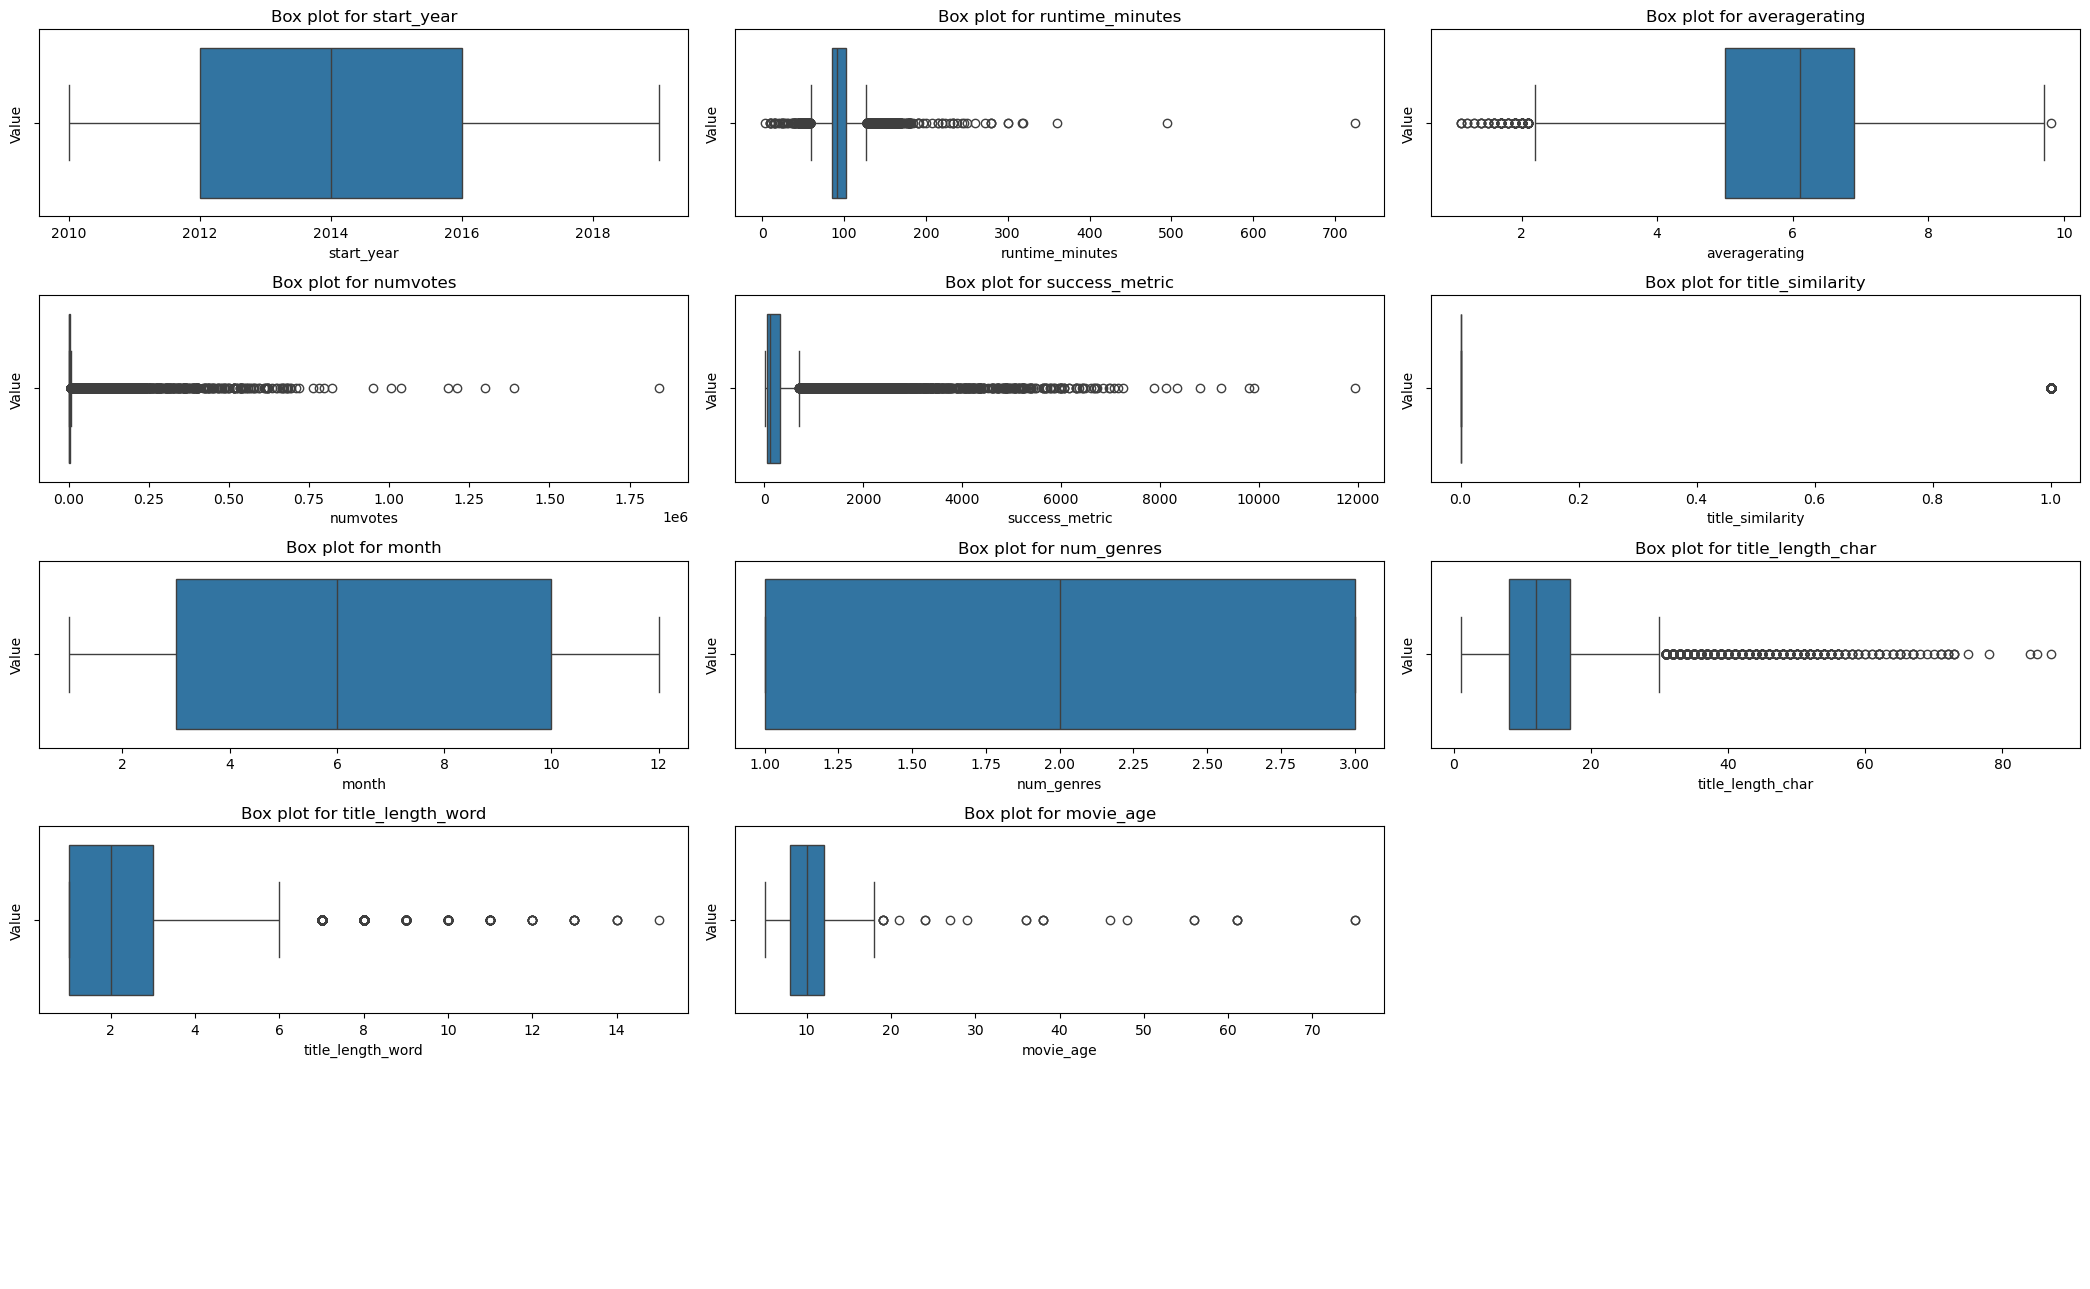

In [27]:
# Only select numeric columns 
numeric_columns = df.select_dtypes(include=['number']).columns[:]

# Grid layout
rows, cols = 5, 3
fig, axes = plt.subplots(rows, cols, figsize=(21, 13))


# Flatten 
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], ax = axes[i])
    axes[i].set_title(f"Box plot for {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Value')
    
# Hide empty subplots 
for j in range(i + 1, rows * cols):
    axes[j].axis('off')
    
plt.tight_layout()
plt.show()


### Dropping Outliers 

In [28]:
# Create a copy of the data
data_copy = df.copy()
# Select only numeric columns
numeric_data = data_copy.select_dtypes(include=['number'])

# Calculate q1, q3, and IQR for numeric data only
q1 = numeric_data.quantile(0.15)  # .25
q3 = numeric_data.quantile(0.90)  # .75
IQR = q3 - q1

# Lower and upper bounds for identifying outliers
lower_bound = q1 - (1.5 * IQR)
upper_bound = q3 + (1.5 * IQR)

# Identify outliers in numeric columns
outliers_ = set()
for col in numeric_data.columns:
    outliers = numeric_data[(numeric_data[col] < lower_bound[col]) | (numeric_data[col] > upper_bound[col])]
    outliers_.update(outliers.index)

# Count number of rows before removing outliers
num_rows_before = len(data_copy)

# Remove rows with outliers from the original DataFrame (important!)
data_copy = data_copy.drop(index=outliers_)

# Num of rows after removing outliers
num_rows_after = len(data_copy)

# Number of rows removed
rows_removed = num_rows_before - num_rows_after

# Print the results
print(f"Number of rows before removing outliers: {num_rows_before}")
print(f"Number of rows after removing outliers: {num_rows_after}")
print(f"Number of rows removed: {rows_removed}")

df = data_copy.copy()


Number of rows before removing outliers: 18268
Number of rows after removing outliers: 16968
Number of rows removed: 1300


# Univariate Analysis

##  Runtime Analysis

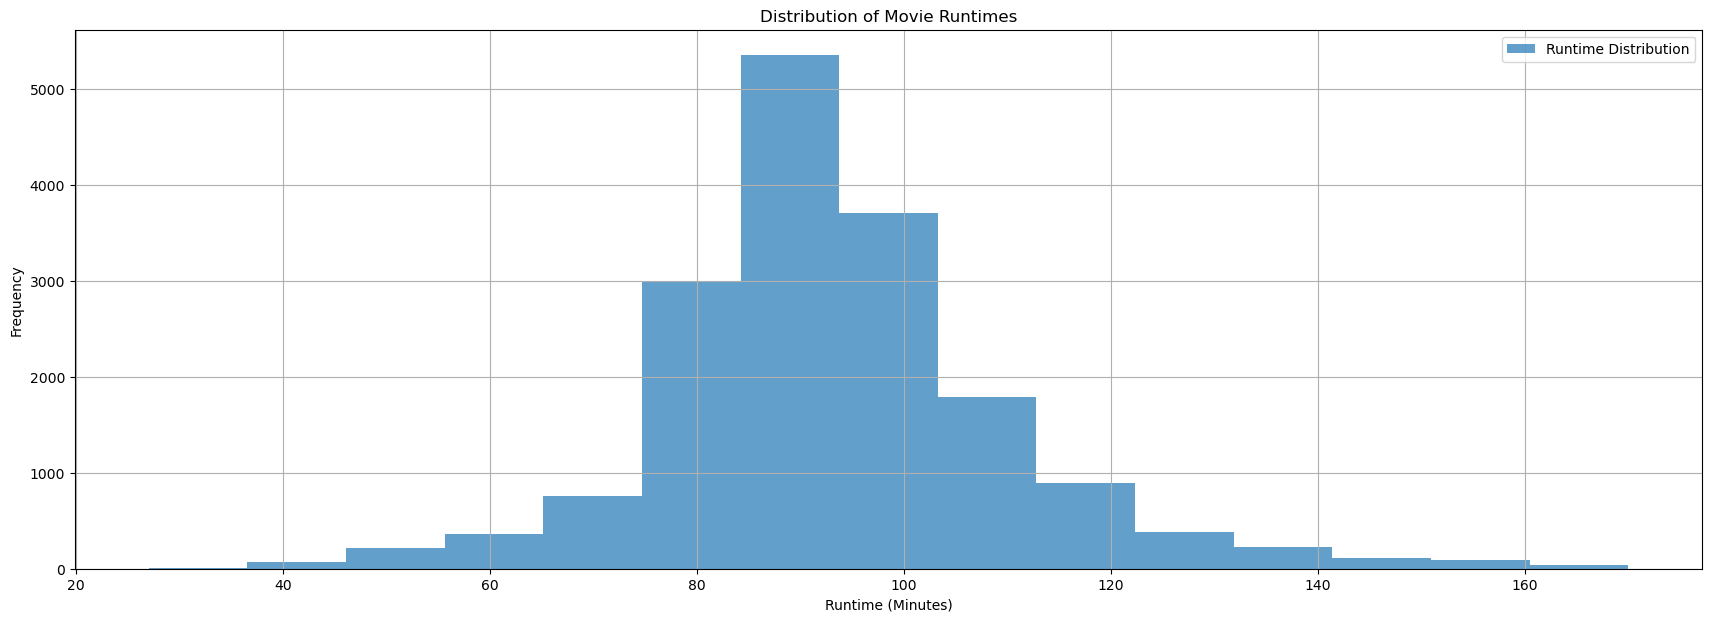

In [29]:
# Set the figure size before plotting
plt.figure(figsize=(21,7))

# Plot the histogram and set the label directly
plt.hist(df['runtime_minutes'], bins=15, alpha=0.7, label='Runtime Distribution')

# Set labels and title
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Frequency')
plt.grid()
plt.legend()

# Show the plot
plt.show()


### Observation 
- **Most common runtime:** The most frequent movie runtimes are clustered around the 90-minute mark, and somewhat around 100 minutes.

- **Typical Range:** A majority of movies fall within the 80 to 110-minute range.

- **Skew:** The distribution is somewhat skewed to the right with a longer tail extending to longer runtimes.

- **Longer Runtimes are less frequent:** Movies with very long runtimes are less frequent.

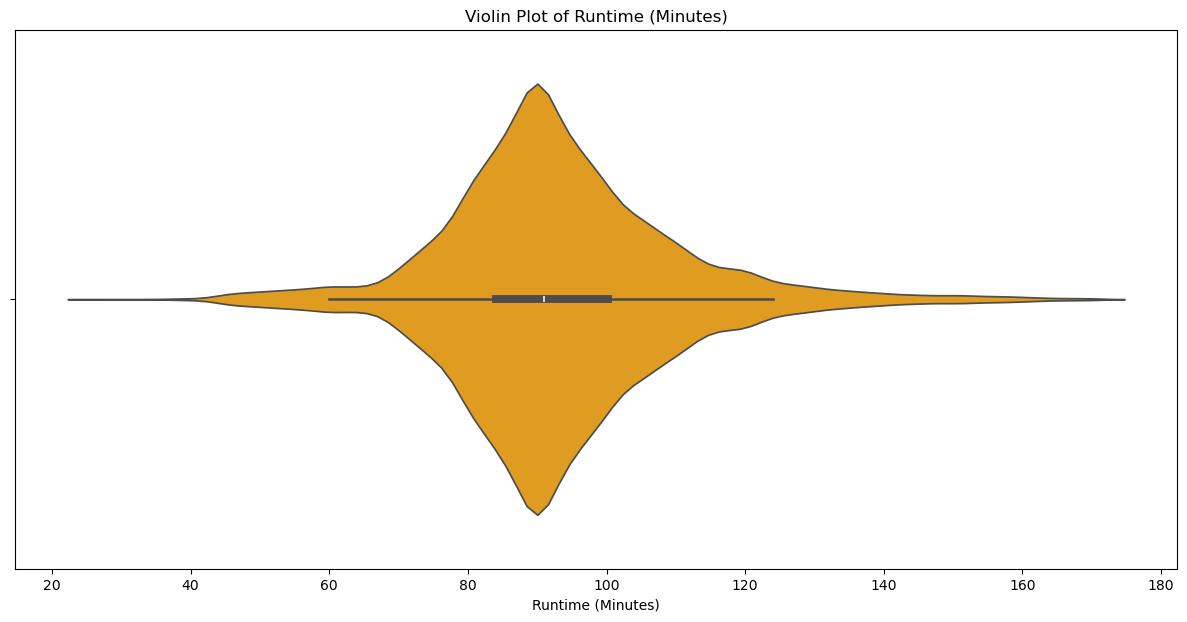

In [30]:
plt.figure(figsize=(15,7))
sns.violinplot(x=df['runtime_minutes'], color='orange')
plt.title('Violin Plot of Runtime (Minutes)')
plt.xlabel('Runtime (Minutes)')
plt.show()


### Observations 
- **Distribution Peak:** The widest part of the violin plot is centered around 90-100 minutes, indicating that this is where movie runtimes are most concentrated.

- **Median Runtime:** The median runtime appears to be around 95 minutes, as indicated by the line inside the central box.

- **Spread:** The plot shows a broad distribution, with the majority of the data within roughly 60 to 120 minutes.

- **Tails:** The violin plot tails extend to less common, shorter (around 40 mins) and longer (around 160 minutes) runtimes.

- **Density:** The plot suggests a higher density of movies around the central area, and less density towards the shorter and longer tails..

## Genre Analysis

### Using the genre

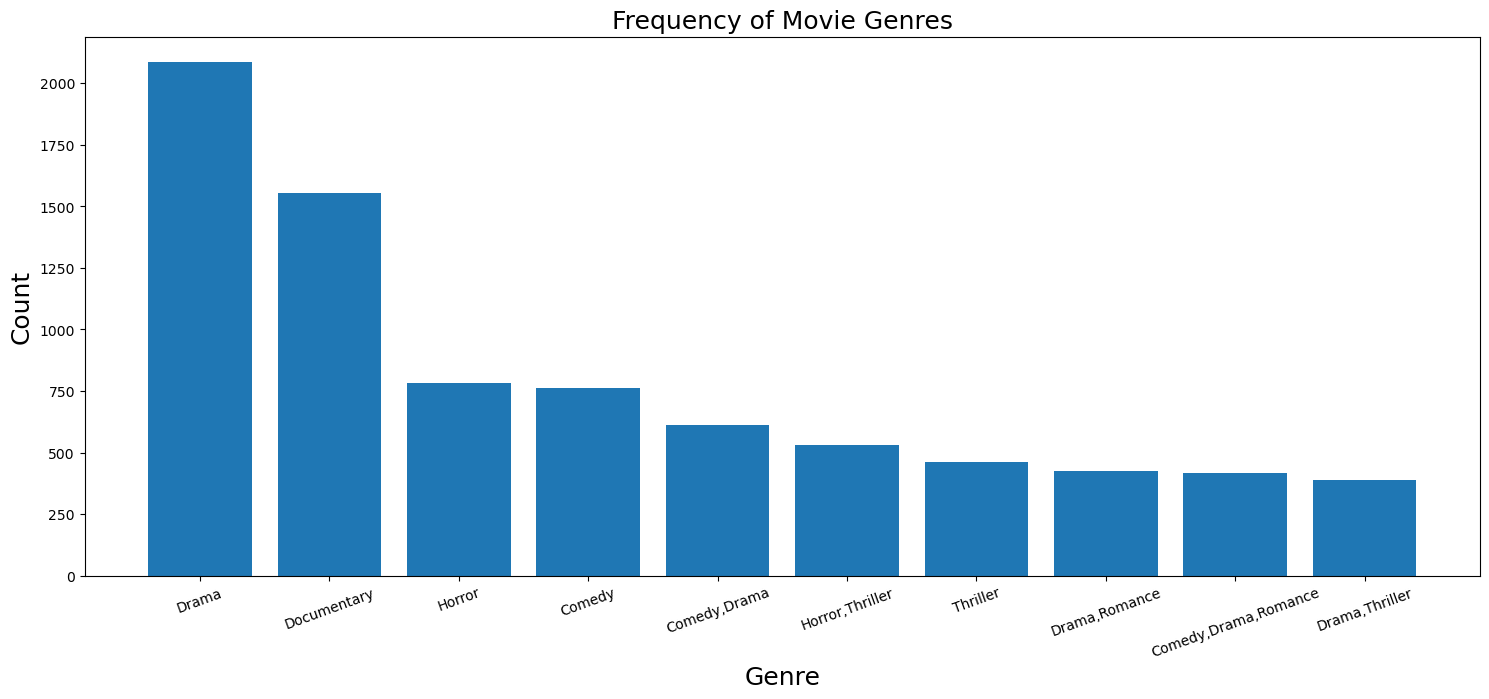

In [31]:
movie_genres = df['genres'].value_counts().reset_index(name='count')[:10]
movie_genres
plt.figure(figsize=(18,7))
plt.bar( movie_genres['genres'],movie_genres['count'] )
plt.title('Frequency of Movie Genres', fontsize=18)
plt.xlabel('Genre', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(rotation=20)

plt.show()

### Using primary genre 

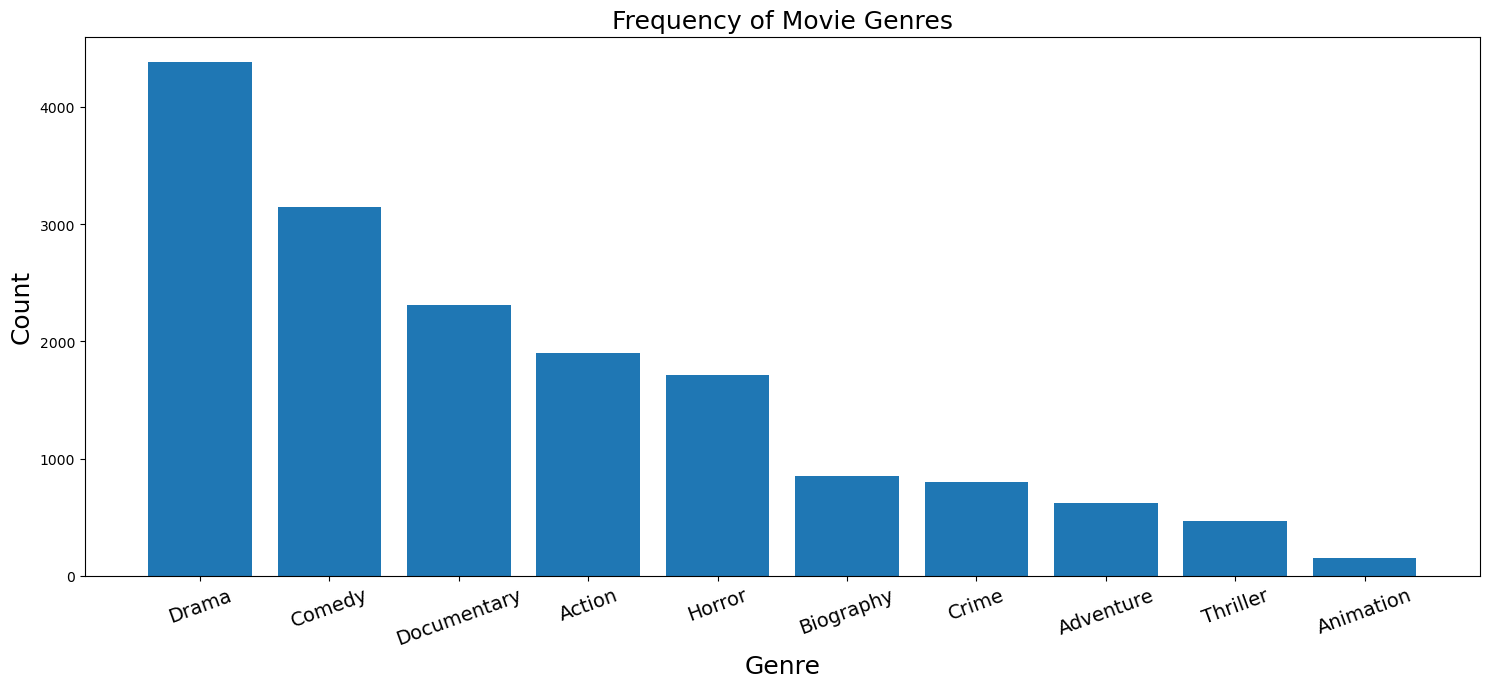

In [32]:
movie_genres = df['genre_1'].value_counts().reset_index(name='count')[:10]
movie_genres
plt.figure(figsize=(18,7))
plt.bar( movie_genres['genre_1'],movie_genres['count'] )
plt.title('Frequency of Movie Genres', fontsize=18)
plt.xlabel('Genre', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(rotation=20, fontsize=14)

plt.show()

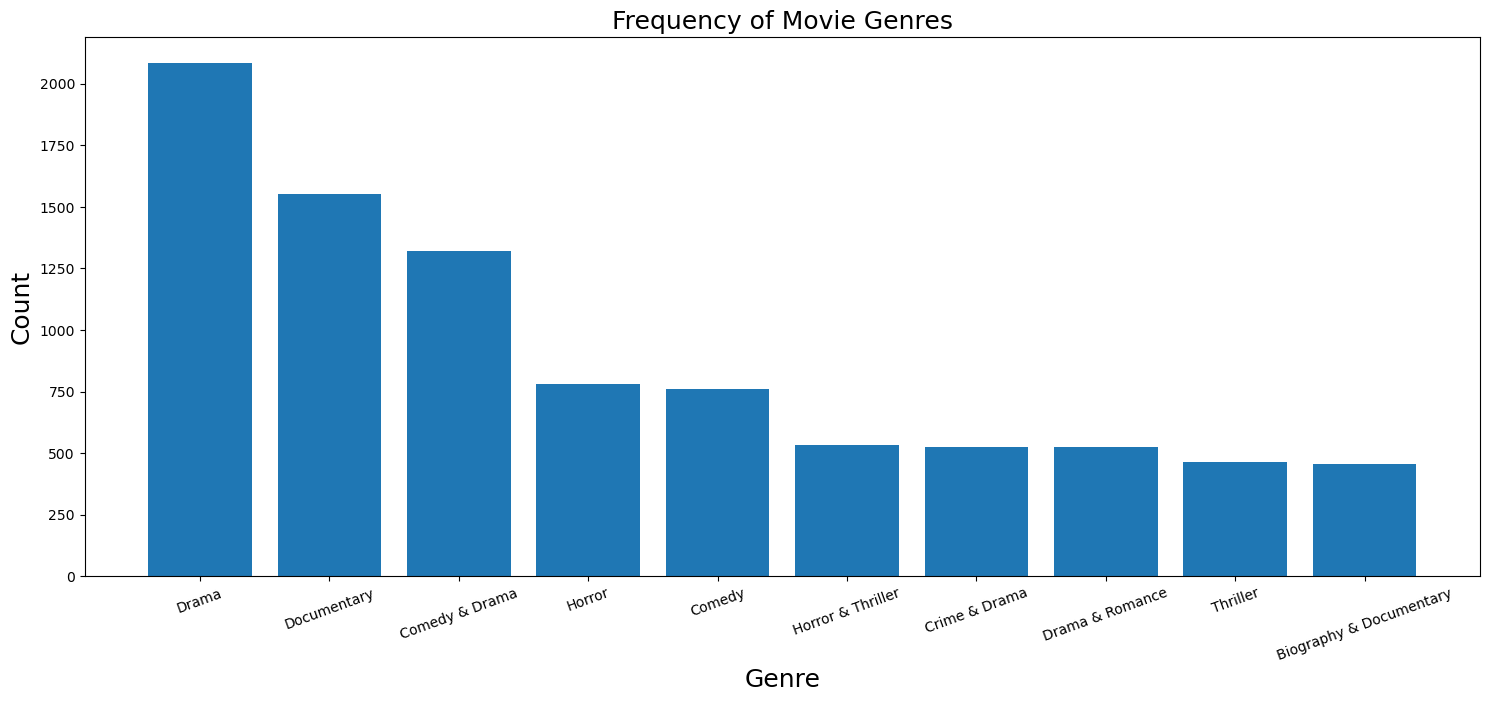

In [33]:
movie_genres = df['genre_combined'].value_counts().reset_index(name='count')[:10]
movie_genres
plt.figure(figsize=(18,7))
plt.bar( movie_genres['genre_combined'],movie_genres['count'] )
plt.title('Frequency of Movie Genres', fontsize=18)
plt.xlabel('Genre', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(rotation=20)

plt.show()

### Observation 
**1. Of the tree charts looking at top 10 genres**
- **Drama** is the most frequent genre, significantly higher than all others.

- **Documentary and Comedy & Drama Follow:** Documentary and Comedy & Drama are the next most common genres, though with fewer movies than Drama.

- **Mid-Range Genres:** Comedy, Horror, Crime & Drama, Action & Adventure, and Drama & Romance are in a similar middle range, with a similar number of movies each.

- **Less Frequent Genres:** Horror & Thriller, and Biography & Documentary are the least common of those shown.

**N/B- I will be using the primary genre going forward (the first genre in a list as primary)**

## Average Rating 

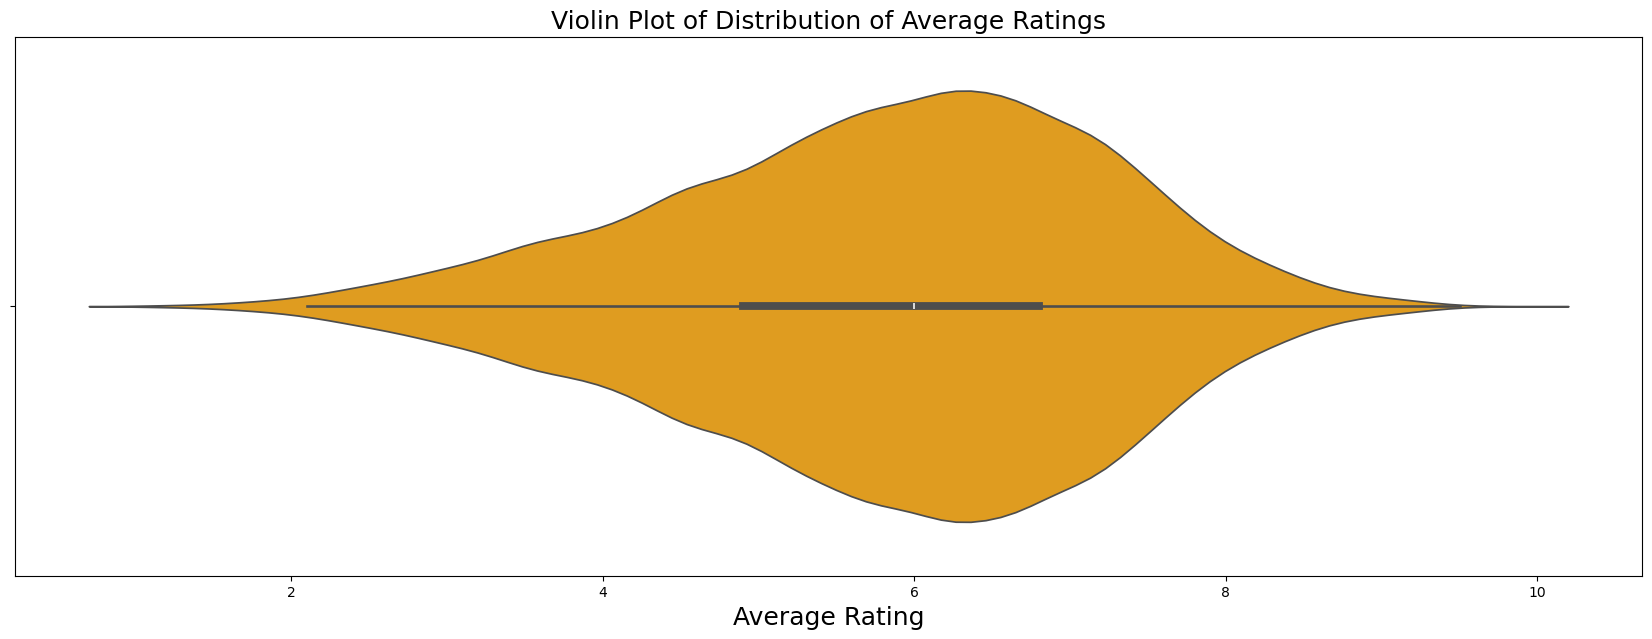

In [34]:
plt.figure(figsize=(21,7))
sns.violinplot(x=df['averagerating'], color='orange')
plt.title('Violin Plot of Distribution of Average Ratings', fontsize=18)
plt.xlabel('Average Rating', fontsize=18)
plt.show()


### Observations 
- **Concentration:** The widest area of the violin plot is around the 6-7 rating range, which indicates that this is where the majority of movie ratings are concentrated.

- **Median:** The median rating is approximately 6.5, as indicated by the line inside the central box.

- **Spread:** The distribution spreads from approximately 1 to 10, but most of the ratings are between approximately 4 and 8.

- **Tails:** The violin tails are thinner and extend towards the lower and higher ratings, suggesting there are fewer movies with average ratings outside the 4 to 8 range.

- **Shape:** The plot suggests a slightly skewed distribution with the bulk of data above the 5 rating mark.

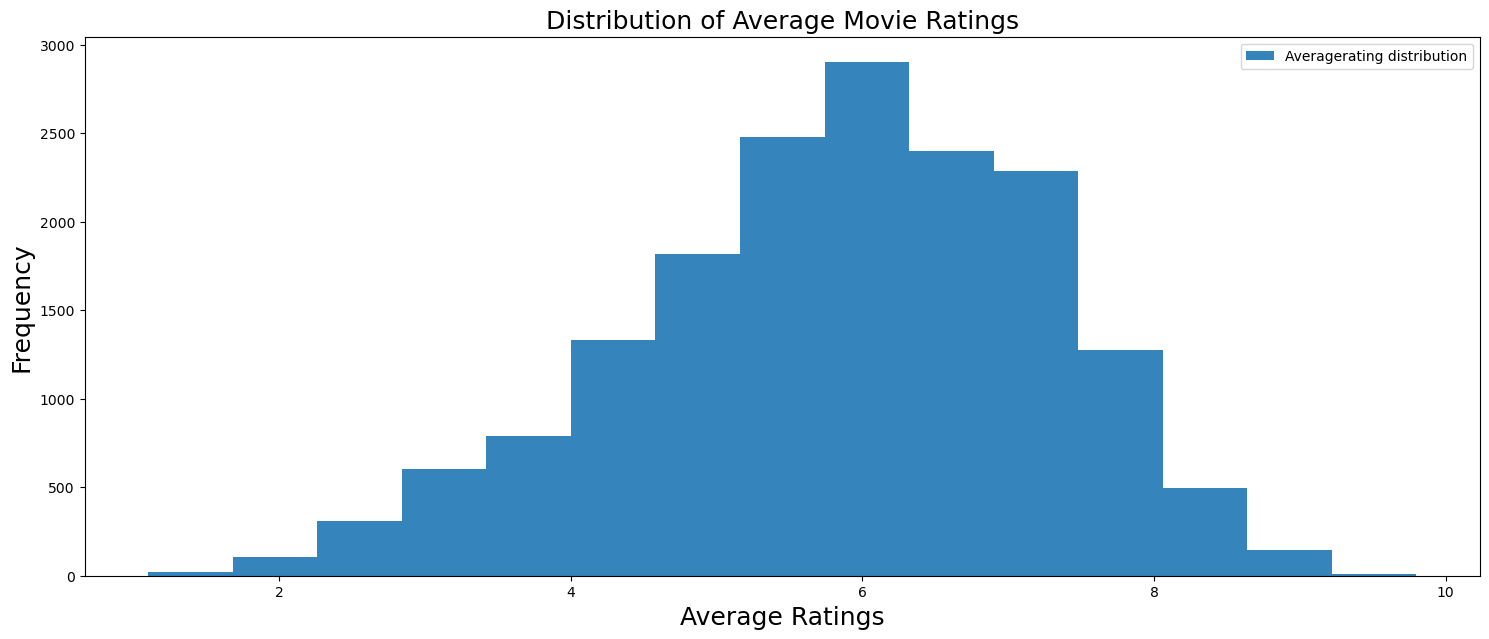

In [35]:
# Set the figure size before plotting
plt.figure(figsize=(18,7))

# Plot the histogram and set the label directly
plt.hist(df['averagerating'], bins=15, alpha=0.9,  label='Averagerating distribution')

# Set labels and title
plt.title('Distribution of Average Movie Ratings', fontsize=18)
plt.xlabel('Average Ratings', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.legend()

# Show the plot
plt.show()


### Observations
- **Peak Frequency:** The highest frequency of movies is within the 6-7 rating range.

- **Typical Range:** Most movies have average ratings between 5 and 8.

- **Distribution Shape:** The distribution appears to be somewhat bell-shaped but is skewed slightly to the left with a longer tail towards lower ratings.

- **Low Frequency extremes:** There are relatively few movies with average ratings below 2 and above 9.

- **Ratings build up:** The ratings start rising slowly from lower ratings to build up towards 6-7.

## Movie Success rating 

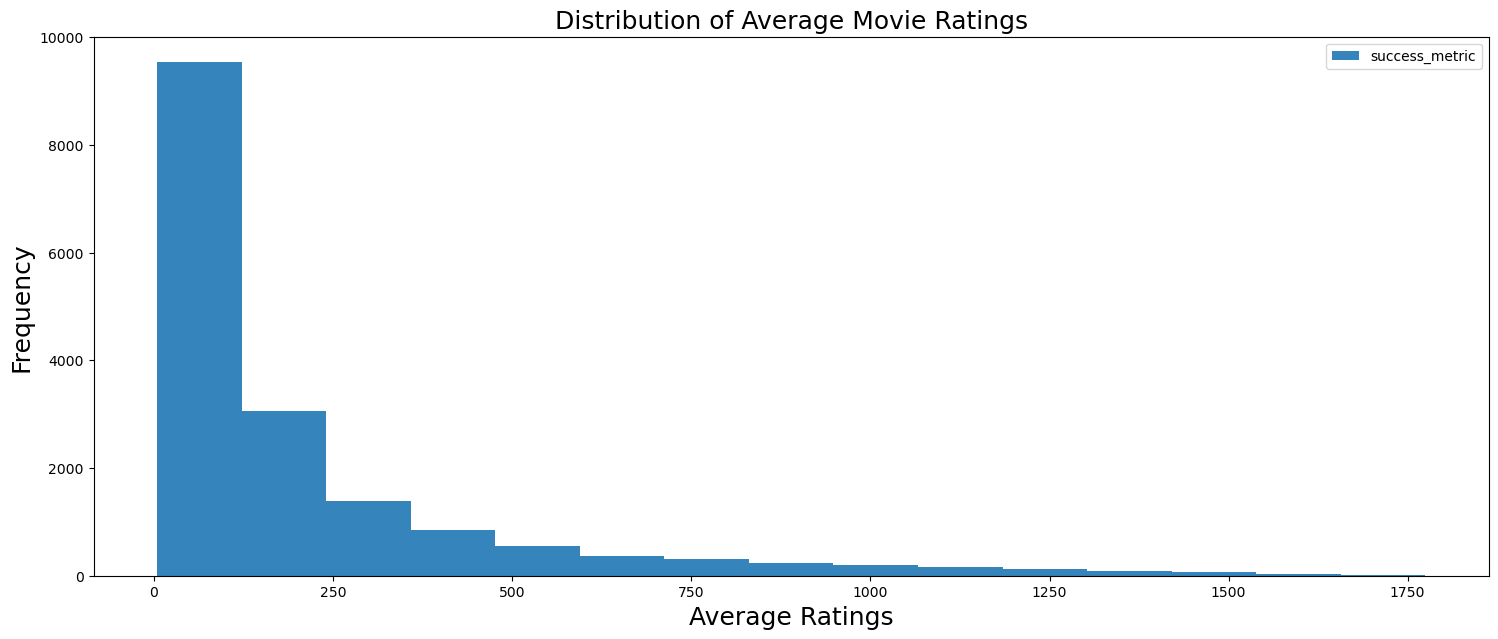

In [36]:
# Set the figure size before plotting
plt.figure(figsize=(18,7))

# Plot the histogram and set the label directly
plt.hist(df['success_metric'], bins=15, alpha=0.9,  label='success_metric')

# Set labels and title
plt.title('Distribution of Average Movie Ratings', fontsize=18)
plt.xlabel('Average Ratings', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.legend()

# Show the plot
plt.show()


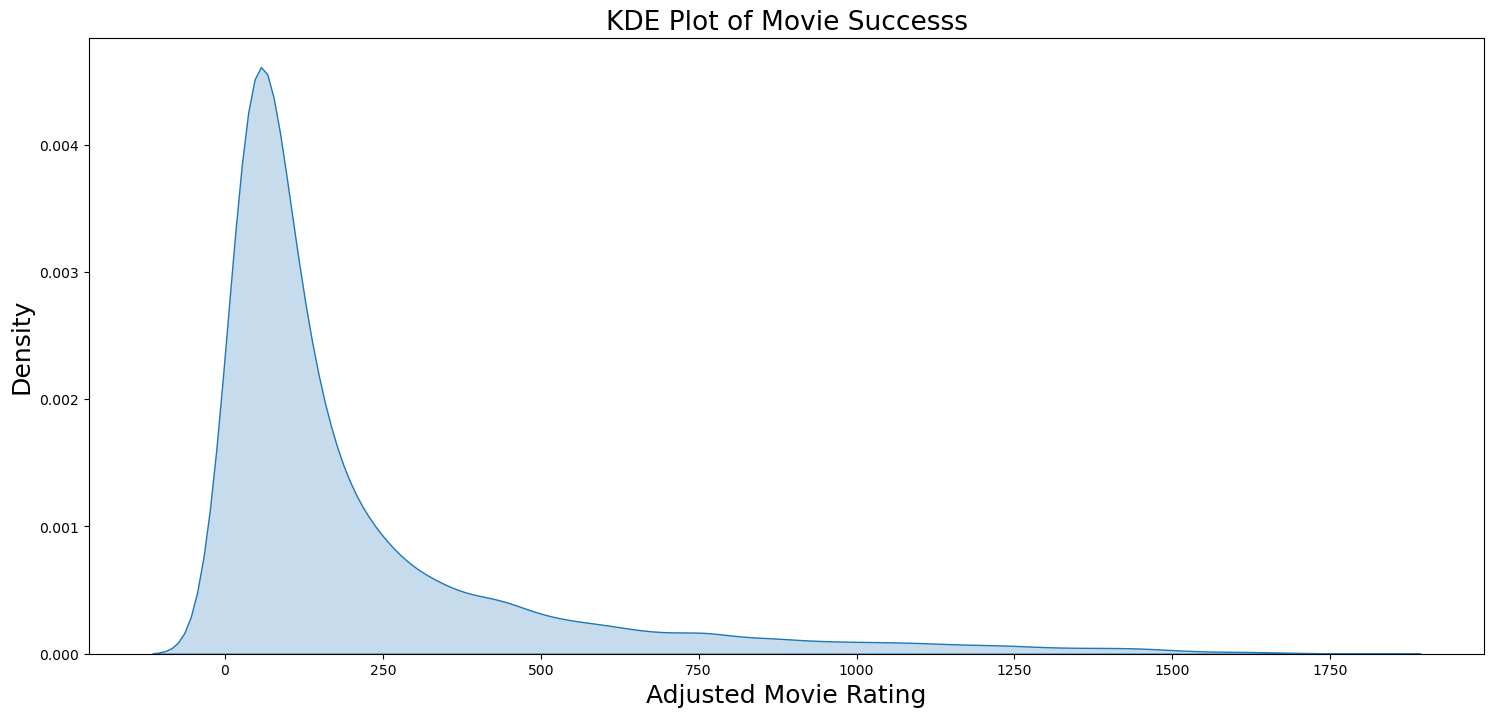

In [37]:
# Assuming 'df' is your DataFrame
plt.figure(figsize=(18, 8))
sns.kdeplot(data=df, x='success_metric', fill=True)

# Add labels and title
plt.title('KDE Plot of Movie Successs', fontsize=19)
plt.xlabel('Adjusted Movie Rating', fontsize=18)
plt.ylabel('Density', fontsize=18)

# Show the plot
plt.show()

### Observations for Average rating and adjusted movie ratings 
**1. Skewness (Right-Skewed Distribution):**
- The KDE plot shows a peak at the lower end of the x-axis, which suggests that most movies have low success metric values. This implies that the majority of movies are either low-rated, have fewer votes, or both.
- The distribution is right-skewed, indicating that a small number of movies have exceptionally high success metrics (outliers or blockbusters).

**2. Density Concentration Near 0-250 Range**
- The highest density is within the 0 to 250 range, meaning a significant proportion of movies fall within this range of success.
- This range represents movies with moderate ratings or limited popularity (or a combination of both).

**3. Long Tail**
- The long tail stretching toward higher success_metric values shows that a small number of movies achieve extremely high success.
- These movies are likely blockbusters or highly acclaimed films with both high ratings and large audiences.

**No Clear Modes Beyond the Peak**
- The chart does not show multiple distinct peaks, indicating there are no separate clusters or tiers of success in the dataset (besides the large concentration of lower-success movies).

## Title length words 

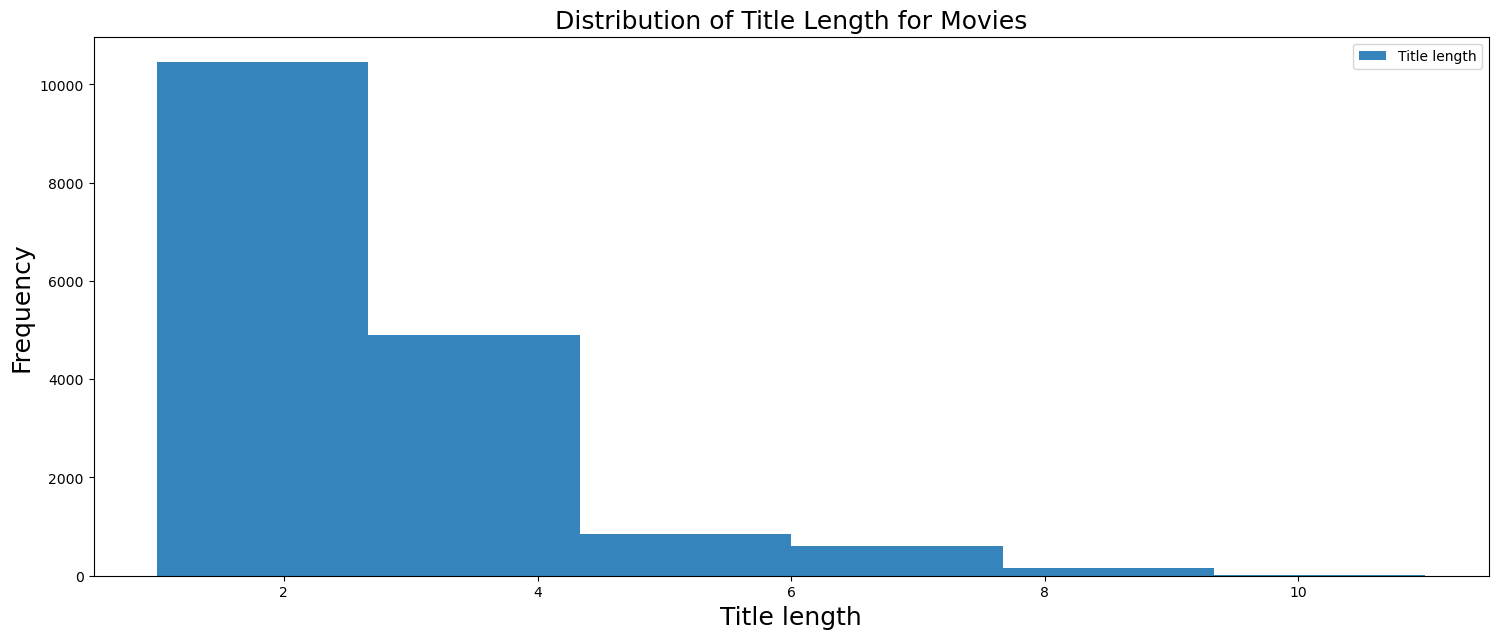

In [38]:
# Set the figure size before plotting
plt.figure(figsize=(18,7))

# Plot the histogram and set the label directly
plt.hist(df['title_length_word'], bins=6, alpha=0.9, label='Title length')

# Set labels and title
plt.title('Distribution of Title Length for Movies', fontsize=18)
plt.xlabel('Title length', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.legend()

# Show the plot
plt.show()


### Observations

- **Short Titles Dominate:** The vast majority of movie titles have a length of 2 or 4 words.

- **Decreasing Frequency:** The frequency of titles decreases significantly as the title length increases.

- **Few Long Titles:** Very few movies have titles longer than 8 words.

- **Skewness:** The distribution is skewed to the right, indicating that shorter titles are much more common than longer titles.

- **Range:** Title lengths range from 1 to 15 words.

### Bar plot for movie_rating

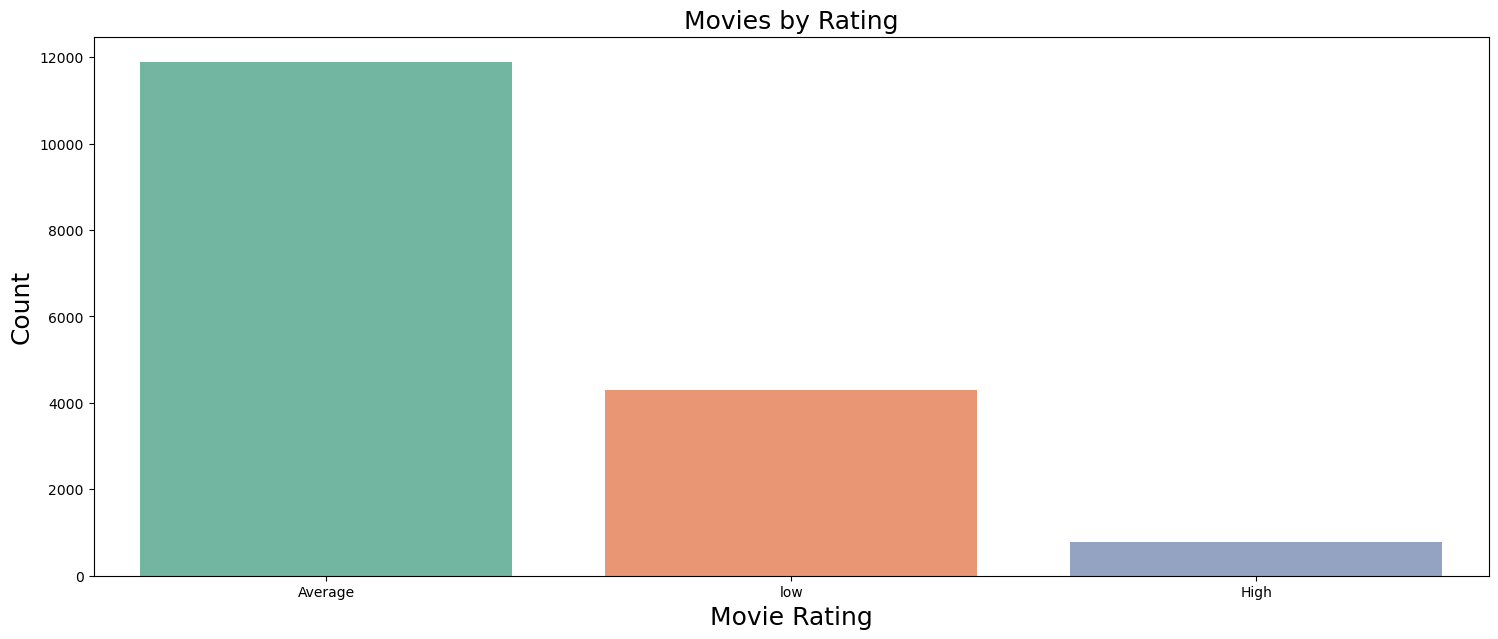

In [39]:
# Using a predefined color palette
plt.figure(figsize=(18,7))
sns.countplot(x='movie_rating', data=df, order=df['movie_rating'].value_counts().index, 
              palette='Set2', hue='movie_rating')

plt.title('Movies by Rating', fontsize=18)
plt.xlabel('Movie Rating', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.show()

### Observation
- **Most Frequent Category:** The "Average" rating category has the highest count of movies, significantly more than the other two categories.

- **Low vs High:** The "Low" rating category has a substantially larger count of movies compared to the "High" rating category.

- **Disparity in Categories:** There is a large difference in the number of movies between the "Average" category and both "Low" and "High" categories. The high rated movies are the less represented category

- **Order of Frequencies:** The categories, ranked from most to least frequent, are "Average", "Low", and then "High".

## Movie length 


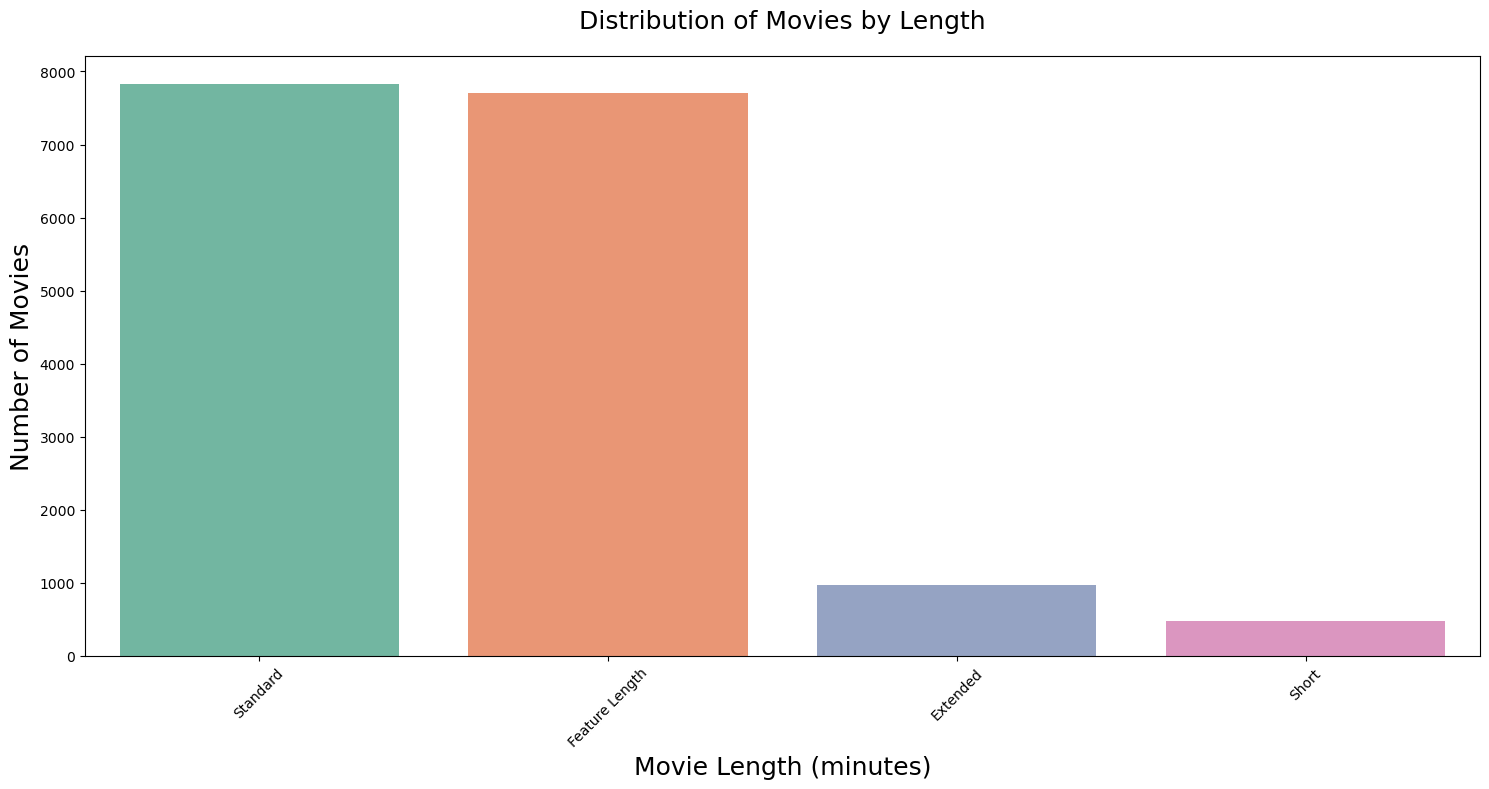

In [40]:
# Calculate the value counts and reset index
movie_length = df['movie_length'].value_counts().reset_index(name='count')

# Create figure with larger size
plt.figure(figsize=(15, 8))

# Create Bar Plot using modern color palette
sns.barplot(
    data=movie_length,
    x='movie_length',
    y='count',
    palette='Set2',
    hue= 'movie_length',
)

# Customize the plot
plt.title('Distribution of Movies by Length', pad=20, fontsize=18)
plt.xlabel('Movie Length (minutes)', fontsize=18)
plt.ylabel('Number of Movies', fontsize=18)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)


# Tight layout to prevent label cutoff
plt.tight_layout()
plt.show()


### Observation
- **Dominant Lengths:** The "Standard" and "Feature Length" categories have the highest number of movies.

- **Similar Frequency:** The counts for "Standard" and "Feature Length" movies are relatively similar to each other.

- **Low Extended:** The "Extended" length category has a much lower number of movies compared to the "Standard" and "Feature Length" categories.

- **Lowest Short:** The "Short" length category has the lowest count of movies.

## Season with most movies

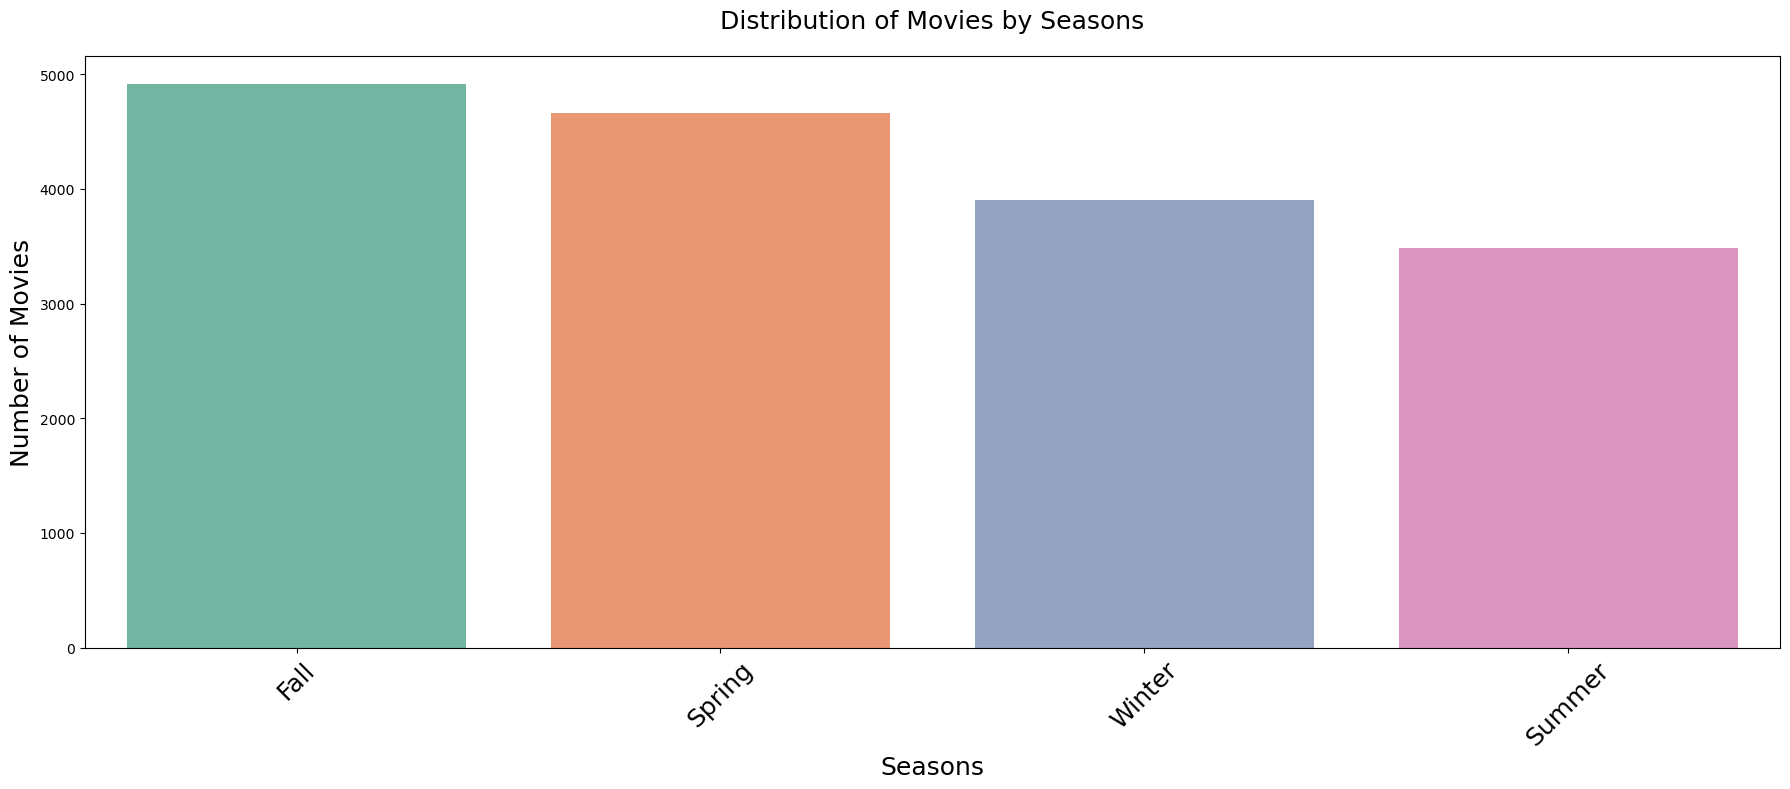

In [41]:
# Calculate the value counts and reset index
movie_length = df['season'].value_counts().reset_index(name='count')

# Create figure with larger size
plt.figure(figsize=(18, 8))

# Create Bar Plot using modern color palette
sns.barplot(
    data=movie_length,
    x='season',
    y='count',
    palette='Set2',
    hue= 'season',
)

# Customize the plot
plt.title('Distribution of Movies by Seasons', pad=20, fontsize=18)
plt.xlabel('Seasons', fontsize=18)
plt.ylabel('Number of Movies', fontsize=18)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=18)


# Tight layout to prevent label cutoff
plt.tight_layout()
plt.show()


### Observation
- **Fall Dominance:** The "Fall" season has the highest count of movie releases.

- **Spring second:** The "Spring" season has the second highest amount of movie releases.

- **Lower Winter and Summer:** The "Winter" and "Summer" seasons have notably lower counts of movie releases compared to "Fall" and "Spring".

- **Summer Least:** The "Summer" season has the lowest count of movie releases among the four seasons.


## Word Cloud 

In [42]:
#! pip install WordCloud

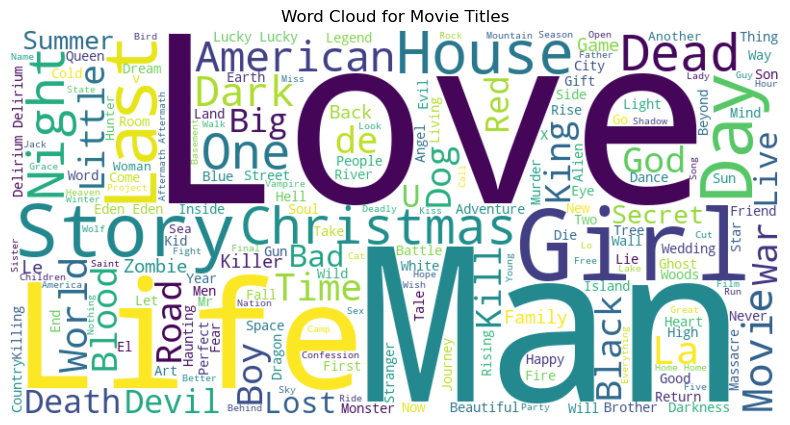

In [43]:
from wordcloud import WordCloud
# Combine all titles into a single string
all_titles = ' '.join(df['title'] + ' ' + df['original_title'])

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)

# Display Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Movie Titles')
plt.show()


### Observations from the Word Cloud:
- **Prominent Words:** The most prominent words, due to their size, are "Love", "Man", "Story" and "Movie" and "Night" and "Last"

- **Common Words:** Several other words appear with relatively high frequency, such as "Kill", "Time", "American", "Day", "Life" "World","Home", "Dead".

- **Smaller Words:** Many other words are present but with smaller font sizes, for example “Red”, “Little”, “War”, “Black”, “House”, “Dream”, "Summer","Dog", "Family", "Road","People", "Return"

- **Variety:** There is a wide variety of words used in movie titles, encompassing different themes and concepts.

### Movie Rating 

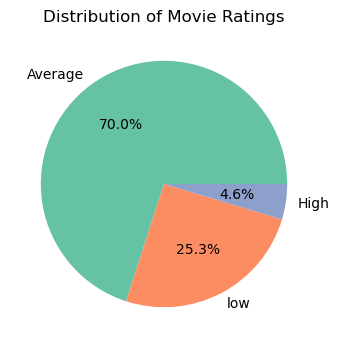

In [44]:
# Pie chart for movie_rating
plt.figure(figsize=(20, 6))
df['movie_rating'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(4, 4), colors=sns.color_palette('Set2'))
plt.title('Distribution of Movie Ratings')
plt.ylabel('')
plt.show()

### Observations 

- Average Ratings Dominate: The largest portion of movies (70%) have "Average" ratings.

- Low Ratings Significant: A substantial portion of movies (25%) have "Low" ratings.

- Few High Ratings: Only a small percentage of movies (4.6%) have "High" ratings.

- Imbalanced Distribution: The distribution is very imbalanced, with the vast majority of movies falling into the "Average" rating category.



# Bivariate Analysis

## Correlation between numeric columns

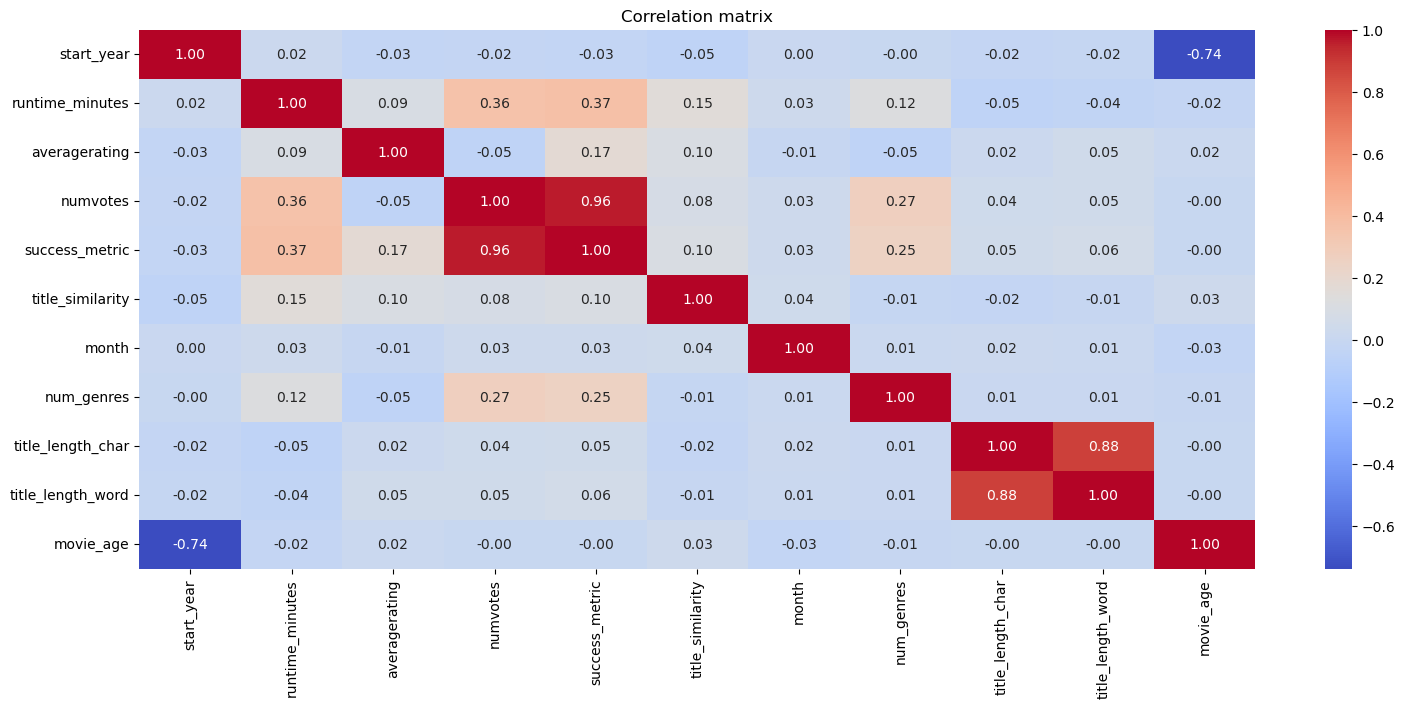

In [45]:
# Only select numeric columns 
numeric_columns = df.select_dtypes(include=['number']).columns[:]

# Correlation matrix 
corr_matrix = df[numeric_columns].corr(method='spearman')

# Plot 
plt.figure(figsize=(18, 7))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

### Observations
**1. High Positive Correlations:**
- success_metric and numvotes (0.96): The success metric is strongly influenced by the number of votes.
- title_length_char and title_length_word (0.88): Longer titles in characters generally correspond to more words.

**2. Strong Negative Correlations:**

- ratings_per_vote and numvotes (-0.99): Indicates an inverse relationship; as the number of votes increases, ratings per vote decrease.
- movie_age and start_year (-0.76): Older movies have lower start year values.

**3. Low or Insignificant Correlations:**
- month shows no significant correlation with most variables, suggesting seasonality may not heavily impact movie success.
- averagerating has weak correlations with most variables, indicating ratings alone do not fully explain success.

**4. General Insights**
- Number of votes is a key driver of the success metric.
- Length and complexity of titles have minimal impact on success.
- Further analysis can target highly correlated features to build predictive models.

In [46]:
# # Checking the relationship between the different columns present

# # Select only numeric columns
# numeric_data = df.select_dtypes(include=['number'])

# sns.pairplot(numeric_data)
# plt.show()


## Genres vs runtime 

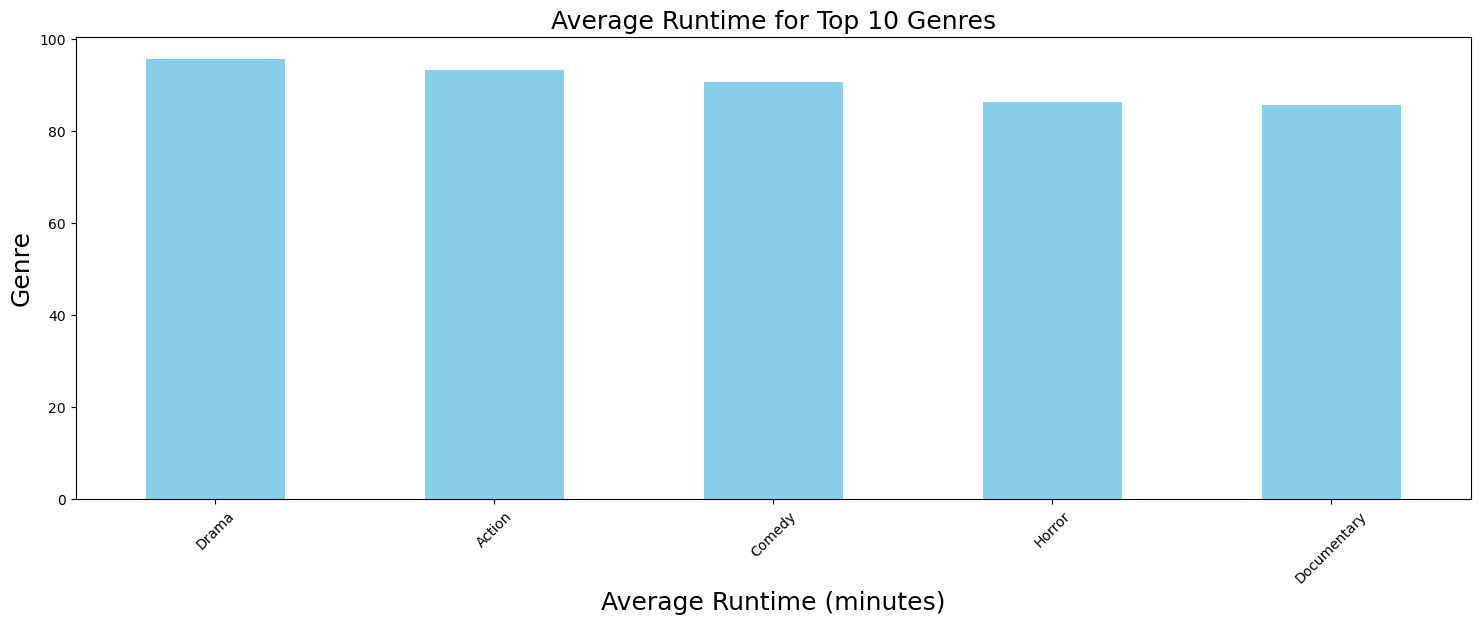

In [47]:
# Assuming the DataFrame is named df
# Step 1: Find the top 10 genres
top_genres = df['genre_1'].value_counts().head(5).index

# Step 2: Filter the dataset to include only top 10 genres
top_genres_df = df[df['genres'].isin(top_genres)]

# Step 3: Group by genre and calculate average runtime
avg_runtime_genre = top_genres_df.groupby('genres')['runtime_minutes'].mean().sort_values(ascending=False)

# Step 4: Plot the average runtime for the top 10 genres
plt.figure(figsize=(18, 6))
avg_runtime_genre.plot(kind='bar', color='skyblue')
plt.title('Average Runtime for Top 10 Genres', fontsize=18)
plt.xlabel('Average Runtime (minutes)', fontsize=18)
plt.ylabel('Genre', fontsize=18)
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

### Observations 
- **Drama Highest:** The "Drama" genre has the highest average runtime among the listed genres.

- **Action Second:** The "Action" genre has the second-highest average runtime.

- **Comedy Middle:** The "Comedy" genre has an average runtime that falls in the middle of the listed genres.

- **Horror Lower:** The "Horror" genre has a lower average runtime compared to "Drama," "Action," and "Comedy".

- **Documentary Lowest:** The "Documentary" genre has the lowest average runtime.

- **Runtime Range:** The average runtimes are within a close range, from around 86 to 96 minutes..

## Genre vs Rating 

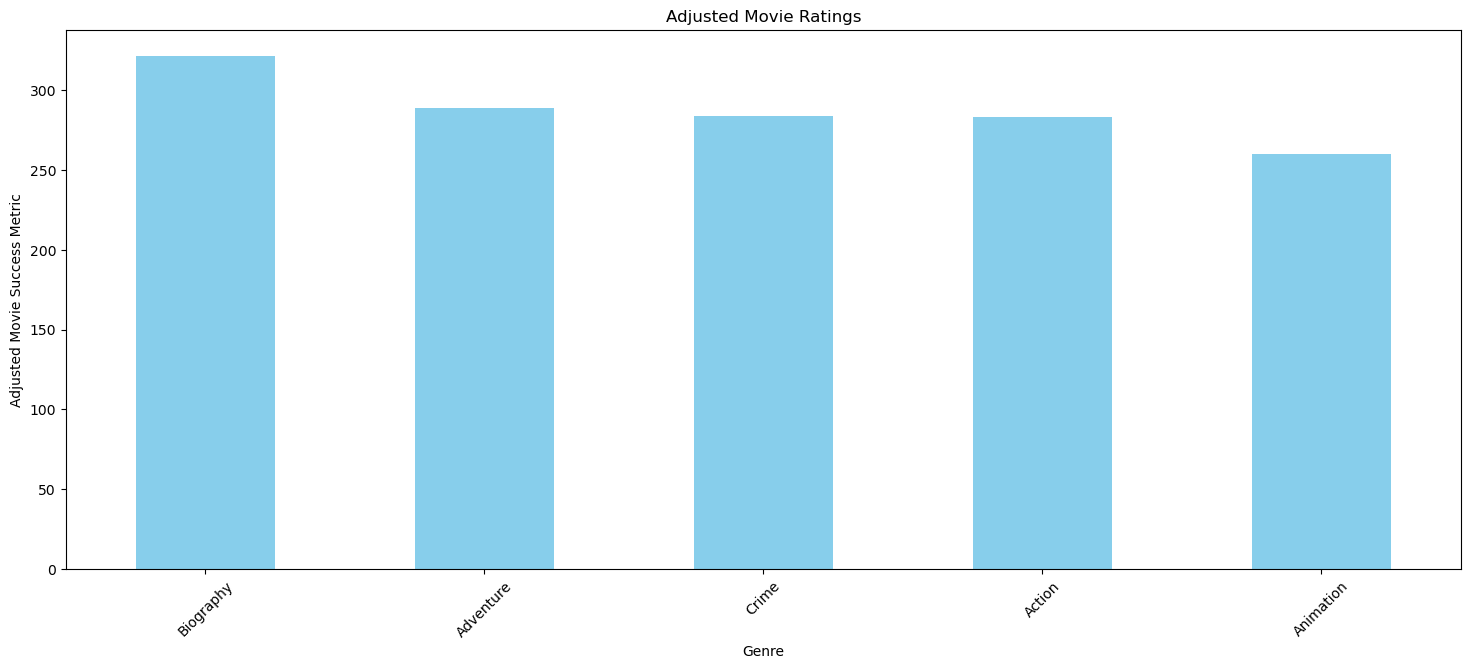

In [48]:
# Step 1: Find the top 15 genres
top_genres = df['genre_1'].value_counts().head(15).index

# Step 2: Filter the DataFrame to only include rows with the top genres
top_genres_df = df[df['genre_1'].isin(top_genres)]

# Step 3: Group by genre and calculate average adjusted movie rating
genre_avg_adjusted_rating = top_genres_df.groupby(
    'genre_1')['success_metric'].mean().sort_values(ascending=False).head(5)

# Step 4: Plot the average adjusted movie rating for the top 10 genres
plt.figure(figsize=(18, 7))
genre_avg_adjusted_rating.plot(kind='bar', color='skyblue')
plt.title('Adjusted Movie Ratings')
plt.ylabel('Adjusted Movie Success Metric')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.show()


### Observation

**1. Biography**
- Movies in the Biography genre have the highest success metric, indicating that they perform well when combining ratings and audience engagement (votes).

**2. Adventure, Crime, and Action**
- These genres have relatively similar success metrics, suggesting they are also popular and engaging genres but not as dominant as Biography.

**3. Animation:** 
- Among the top genres shown, Animation has the lowest success metric, although it still ranks well compared to other genres not depicted.

**Insights**
- Biography movies tend to resonate more with audiences, achieving a strong balance between ratings and voting volume.
- Action and Adventure are consistently popular, likely due to broad audience appeal.
- These findings can guide movie studios in focusing on genres that maximize audience engagement for higher success.

## Split

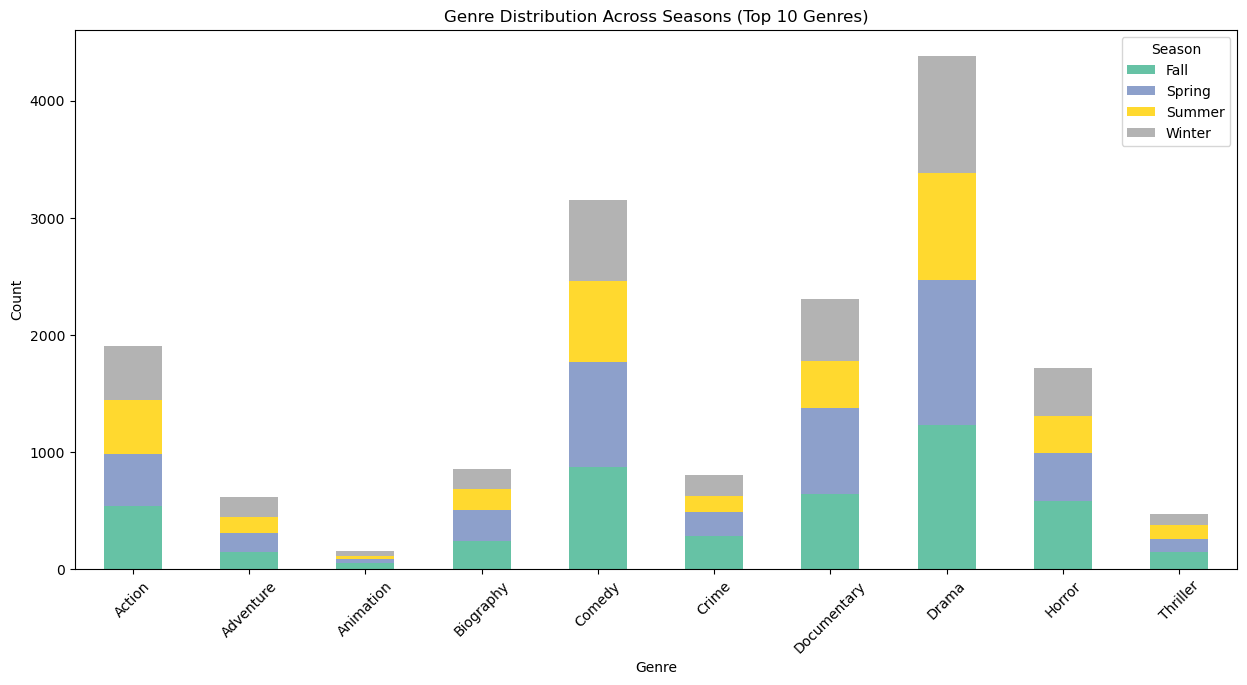

In [49]:
# Step 1: Find the top 10 genres instead of 15
top_10_genres = df['genre_1'].value_counts().head(10).index  # Only get top 10
top_genres_df = df[df['genre_1'].isin(top_10_genres)]  # Filter the DataFrame to only include top 10 genres

# Step 2: Group by genre and season, and count the occurrences
genre_season_counts = top_genres_df.groupby(['genre_1', 'season']).size().unstack(fill_value=0)

# Step 3: Plot the genre vs. season using a stacked bar chart
genre_season_counts.plot(kind='bar', stacked=True, figsize=(15, 7), colormap='Set2')
plt.title('Genre Distribution Across Seasons (Top 10 Genres)')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Season')
plt.show()


### Observations
**1. Drama Season Distribution:** 
- The "Drama" genre has a large presence in all seasons with a good amount of release during the summer.

**2. Comedy Season Distribution:** 
- The "Comedy" genre has a large presence in all seasons with a lot of releases during the summer.

**3. Action Season Distribution:** 
- The "Action" genre has releases across all seasons, with a strong presence in Fall.

**4. Genre Variance:**
- Different genres show different distributions across the seasons.

**5. Consistent Fall:
- Many genres, such as Action, Drama, and Comedy have a significant number of releases during the "Fall" season.

**6. Spring Trend:**
- Many genres, like Drama, Comedy, and Action have a good amount of releases during "Spring".

**Summer Trend:** 
- Some genres, such as "Drama", "Comedy" and "Documentary", show a decent amount of releases during the "Summer" season.

**8. Winter Trend:**
- Some genres, such as "Comedy", "Action" and "Drama" show a considerable amount of releases during the "Winter" season

## Time series 

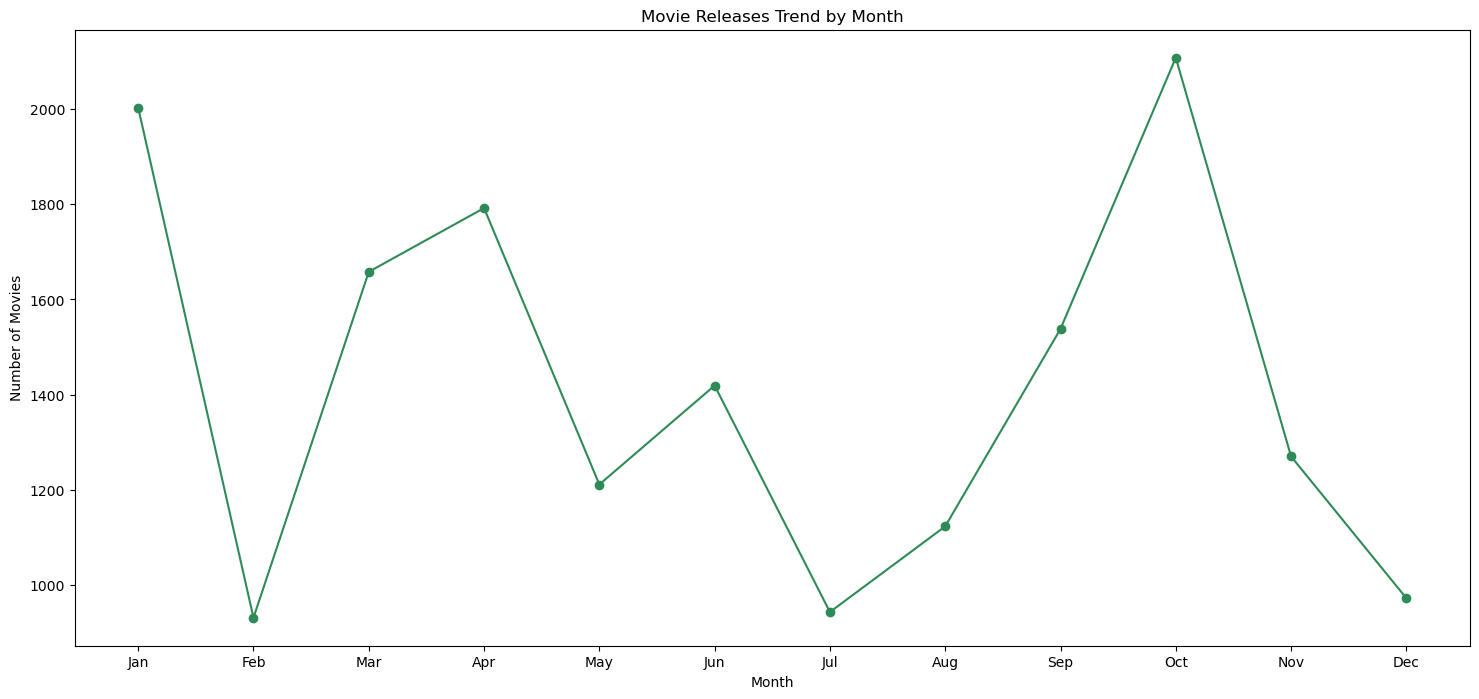

In [50]:
# Analysis 1: Title (sum) vs Month
# Step 1: Extract the month from the release_date
df['month'] = df['release_date'].dt.month

# Step 2: Group by month and count the number of movies
monthly_movie_count = df.groupby('month').size()

# Step 3: Plot the trend of movie releases per month
plt.figure(figsize=(18, 8))
monthly_movie_count.plot(kind='line', marker='o', color='seagreen')
plt.title('Movie Releases Trend by Month')
plt.xlabel('Month')
plt.ylabel('Number of Movies')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

### Observations 
- **October Peak:** There's a clear peak in movie releases during October, which is the highest point on the graph.

- **February Dip:** February has the lowest number of movie releases, showing a noticeable dip.

- **Fluctuating Trend:** The number of movie releases fluctuates throughout the year, with a general upward trend from July to October, and then a sharp decline.

- **Early Year Releases:** January starts with a relatively high number of releases, but that decreases quickly.

- **Mid-Year Dip:** There's a lower release count in July, before an upward trend.

- **Late-Year Drop:** Following the peak in October, releases decline through November and December.

## Movie Production Trends over Time 

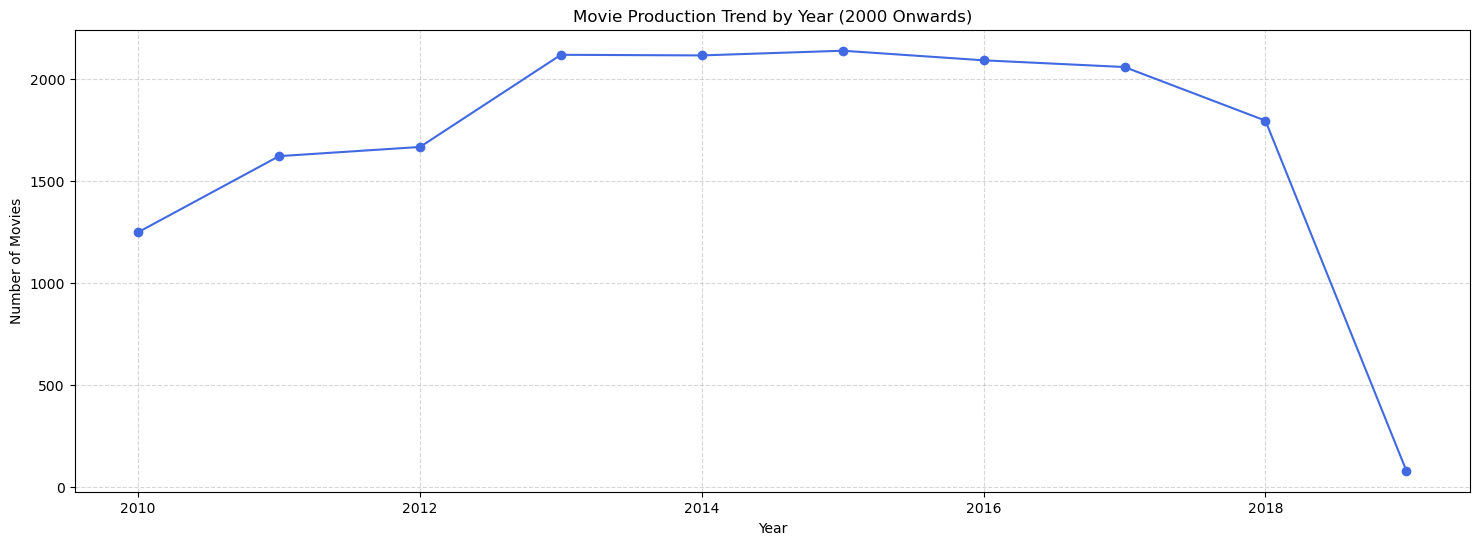

In [51]:
# Step 1: Extract the year from the release_date
df['year'] = df['release_date'].dt.year.astype(int) 

# Step 2: Filter the data to include only years from 2000 onwards
df_filtered = df[df['year'] >= 2010]

# Step 3: Group by year and count the number of movies
yearly_movie_count = df_filtered.groupby('year').size()

# Step 4: Plot the trend of movie releases per year starting from 2000
plt.figure(figsize=(18, 6))
yearly_movie_count.plot(kind='line', marker='o', color='royalblue')
plt.title('Movie Production Trend by Year (2000 Onwards)')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True, linestyle='--', alpha=0.5)  # Optional: Add gridlines for better readability
plt.show()

# Observations 
- **Initial Increase:** The number of movies produced showed a clear increase from 2010 to around 2013.

- **Plateau Period:** There was a plateau or a period of relatively stable production numbers from around 2013 to 2017.

- **Sharp Decrease:** A sharp and steep decline in movie production is noticeable from 2017 through 2019.

- **2010 Start:** 2010 has the lowest number of movies before the rise, before peaking.

- **2019 Lowest:** 2019 has a very low count of movies compared to other years.



## Genre movie runtimes 

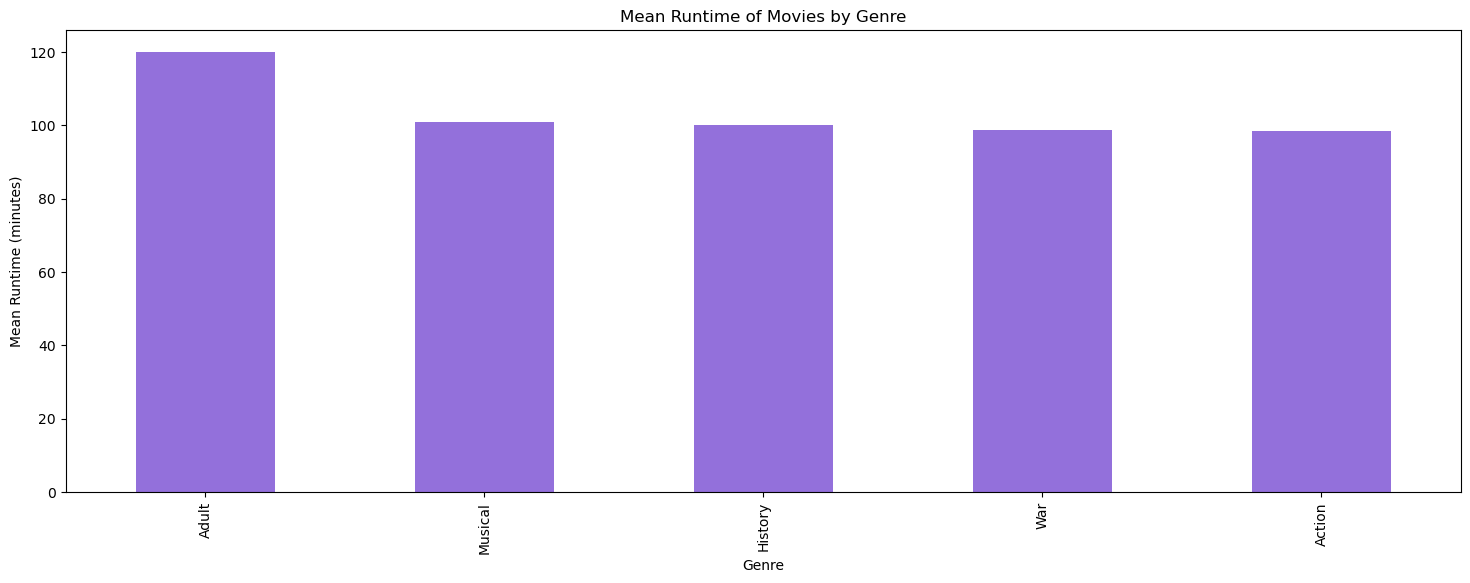

In [52]:
genre_mean_runtime = df.groupby('genre_1')['runtime_minutes'].mean().sort_values(ascending=False)[:5]

# Plot 
plt.figure(figsize=(18, 6))
genre_mean_runtime.plot(kind='bar', color='mediumpurple')
plt.title('Mean Runtime of Movies by Genre')
plt.ylabel('Mean Runtime (minutes)')
plt.xlabel('Genre')
plt.show()

### Observation
- **Adult Longest:** The "Adult" genre has the highest mean runtime, being significantly longer than all other genres.

- **Action, Musical, History, War close second:** Action, Musical, History and War follow quite closely with the same runtime range.

- **General Consistency:** Most genres have a mean runtime between approximately 90 and 100 minutes.

- **Sport shortest:** the sport genre movies have the shortest runtime.

- **Small Variation:** The variation in runtime between genres is relatively small, besides the "Adult" genre, and most genres have similar average lengths.

## ANOVA

- **Null Hypothesis ($𝐻_0$):** The mean ratings of movies are the same across all genres.
- **Alternative Hypothesis ($𝐻_1$):** At least one genre has a mean rating that is significantly different from the others.

In [53]:
from scipy.stats import f_oneway

# Group ratings by genres
groups = [df[df['genre_1'] == genre]['success_metric'] for genre in df['genre_1'].unique()]

# Perform ANOVA
f_stat, p_value = f_oneway(*groups)

# Results
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant difference in ratings between genres.")
else:
    print("No significant difference in ratings between genres.")


F-statistic: 39.83145145566851
P-value: 2.3349282003624516e-159
There is a significant difference in ratings between genres.


# Multivariate Analysis 

## Analysis of Movie Success vs Genre in Diffrent Seasons

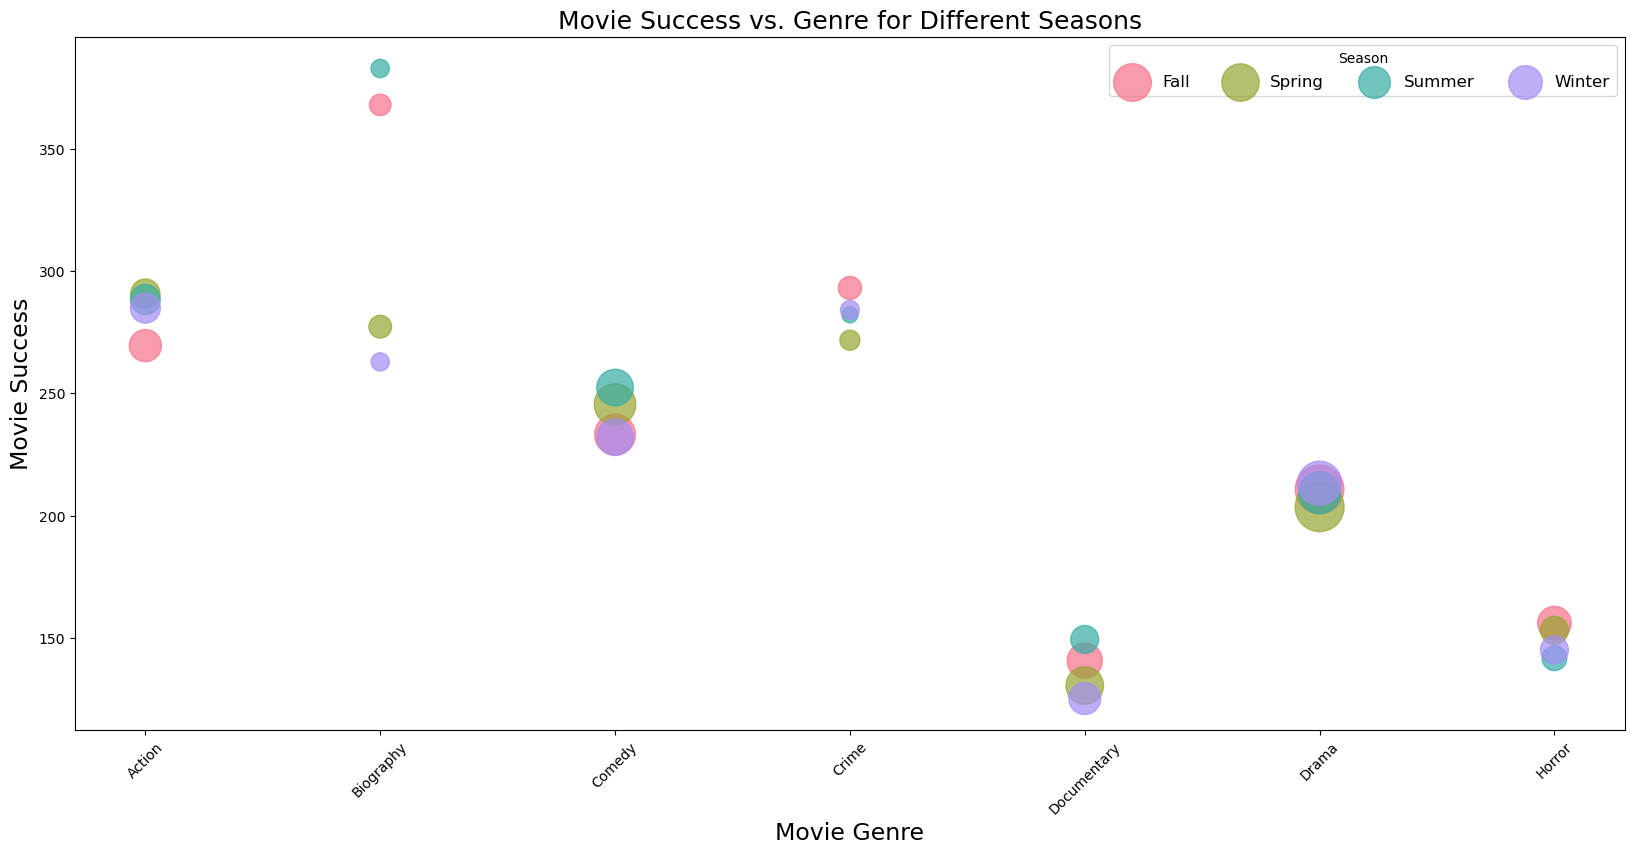

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 7 genres by count
top_genres = df['genre_1'].value_counts().head(7).index

# Filter data for top genres only
df_top_genres = df[df['genre_1'].isin(top_genres)]

# Group data by genre and season, and aggregate success_metric and id (count of movies)
genre_season_data = df_top_genres.groupby(['genre_1', 'season']).agg({
    'success_metric': 'mean',
    'id': 'count'  
}).reset_index()

# Bubble chart for success_metric vs. season for top genres
plt.figure(figsize=(20, 9))
palette = sns.color_palette("husl", len(genre_season_data['season'].unique()))

for i, season in enumerate(genre_season_data['season'].unique()):
    season_subset = genre_season_data[genre_season_data['season'] == season]
    plt.scatter(
        season_subset['genre_1'], 
        season_subset['success_metric'], 
        s=season_subset['id'] * 1.0,  # Bubble size based on movie count
        label=season, alpha=0.7,
        color=palette[i]
    )

# Add titles, labels, and legend
plt.title('Movie Success vs. Genre for Different Seasons', fontsize=18)
plt.xlabel('Movie Genre', fontsize=17)
plt.ylabel('Movie Success', fontsize=17)
plt.xticks(rotation=45)
plt.legend(loc='upper right', fontsize=12, title='Season', ncol=4)
plt.show()


### Observations
- Biography shows the highest success peak, with particular strength in summer releases, though the bubble size suggests relatively fewer movies in this category. Fall releases also perform well in this genre.

- Action films maintain consistently high success rates across all seasons (around 250-300 success metric), with very similar performance regardless of release timing, suggesting this genre is relatively season-agnostic.

- Drama shows moderate success levels (around 200) with fairly uniform performance across seasons, but with slightly better results in winter, indicated by the larger purple bubble.

- Horror films consistently show the lowest success metrics (around 150) across all seasons, though there's minimal seasonal variation in their performance.

- Crime shows notable seasonal variation, performing best in fall (pink bubble) and slightly lower in other seasons, suggesting strategic timing could be important for this genre's success.

## Movie Success across genres and rating 

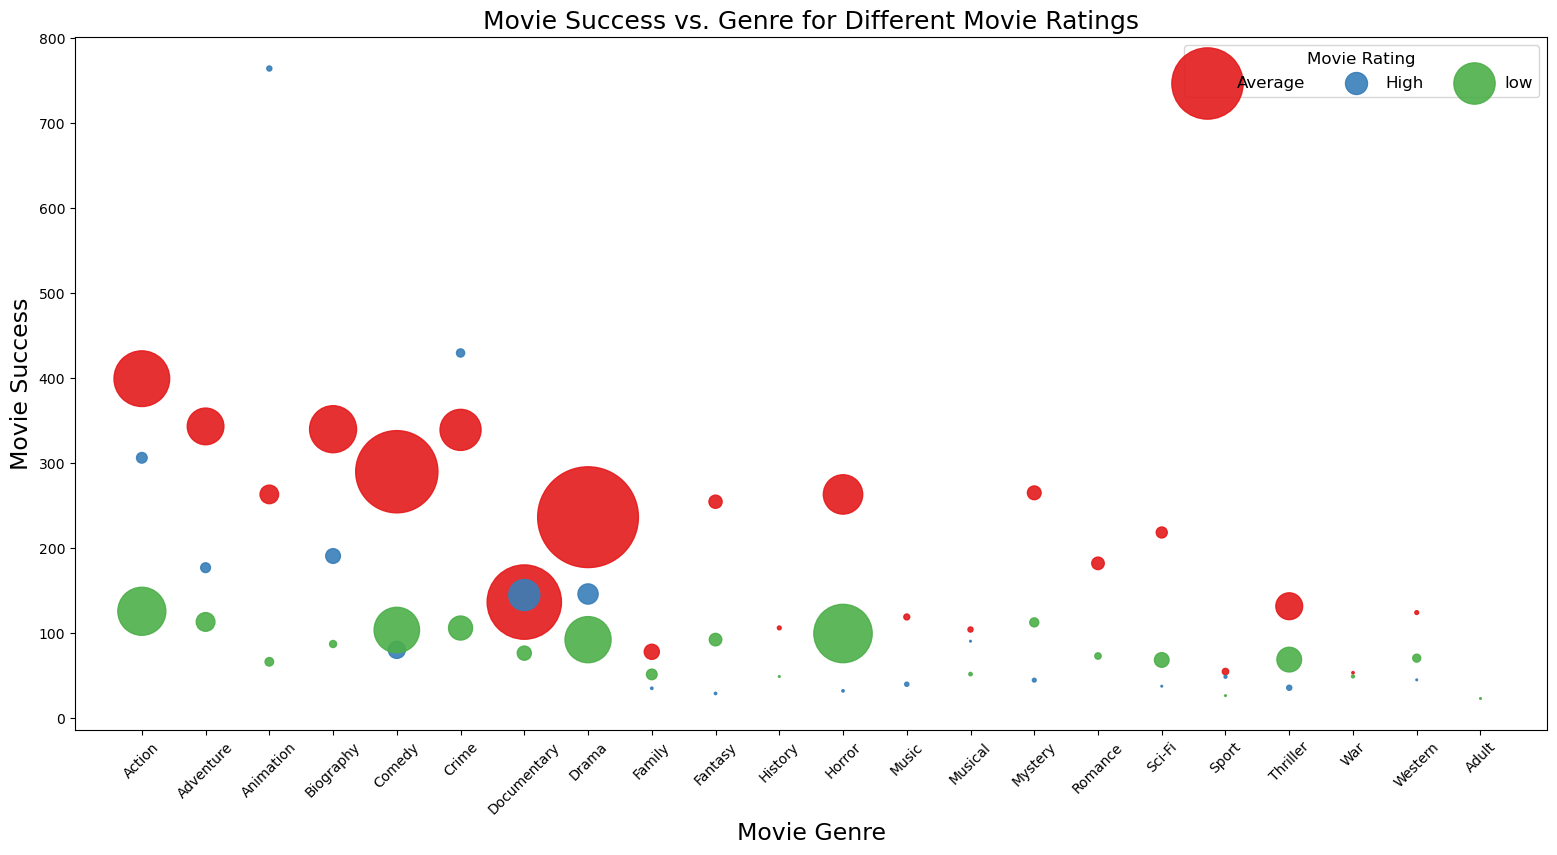

In [56]:

# Group data by genres and movie age
genre_age_data = df.groupby(['genre_1', 'movie_rating']).agg({
    'success_metric': 'mean',
    'id': 'count'  
}).reset_index()

# Bubble chart for numvotes vs. movie age for genres
plt.figure(figsize=(19, 9))
palette = sns.color_palette("Set1", len(genre_age_data['movie_rating'].unique()))

for i, genre in enumerate(genre_age_data['movie_rating'].unique()):
    genre_subset = genre_age_data[genre_age_data['movie_rating'] == genre]
    plt.scatter(
        genre_subset['genre_1'], 
        genre_subset['success_metric'], 
        s=genre_subset['id'] * 1.5,
        label=genre, alpha=0.9,
        color=palette[i]
    )

# Add titles, labels, and legend
plt.title('Movie Success vs. Genre for Different Movie Ratings', fontsize=18)
plt.xlabel('Movie Genre', fontsize=17)
plt.ylabel('Movie Success', fontsize=17)
plt.xticks(rotation=45)

# Adjust the legend for better spacing
plt.legend(
    loc='upper right',  # Place it to the left of the chart
    fontsize=12,  
    title='Movie Rating',  
    title_fontsize=12,  
    ncol=3  # Arrange legend in 2 columns
)
plt.show()




### Key observations about movie success across genres and ratings:

- **Documentary films** show the highest concentration of success, with a particularly large bubble in the "Average" rating category, suggesting they consistently perform well despite not being highly rated.
- **Action and Adventure genres** tend to have higher success metrics, especially for "Average" rated movies, indicating that these genres can succeed even without exceptional ratings.
- **Most highly successful movies (higher on the y-axis)** fall in the "Average" rating category (red bubbles), suggesting that critical acclaim (High rating) isn't necessarily correlated with success.
- **Horror, Music, and Romance genres** show relatively smaller bubbles, indicating fewer movies in these categories, but they maintain moderate success levels.
- **Low-rated movies (green bubbles)** consistently show lower success metrics across all genres, suggesting that poor ratings do generally impact a movie's success.
- **There's a notable gap between Average-rated and Low-rated movies' success levels,** with very few low-rated movies achieving high success metrics.
- **Western and Adult genres** appear at the far right with relatively small bubbles, indicating these are less common genres with generally lower success metrics.
- **Comedy and Drama** show large bubbles in the "Average" rating category with moderate success levels, suggesting these are popular genres that perform reliably but rarely achieve exceptional success.

## Comparing Movie Success vs. Genre for Different Lengths

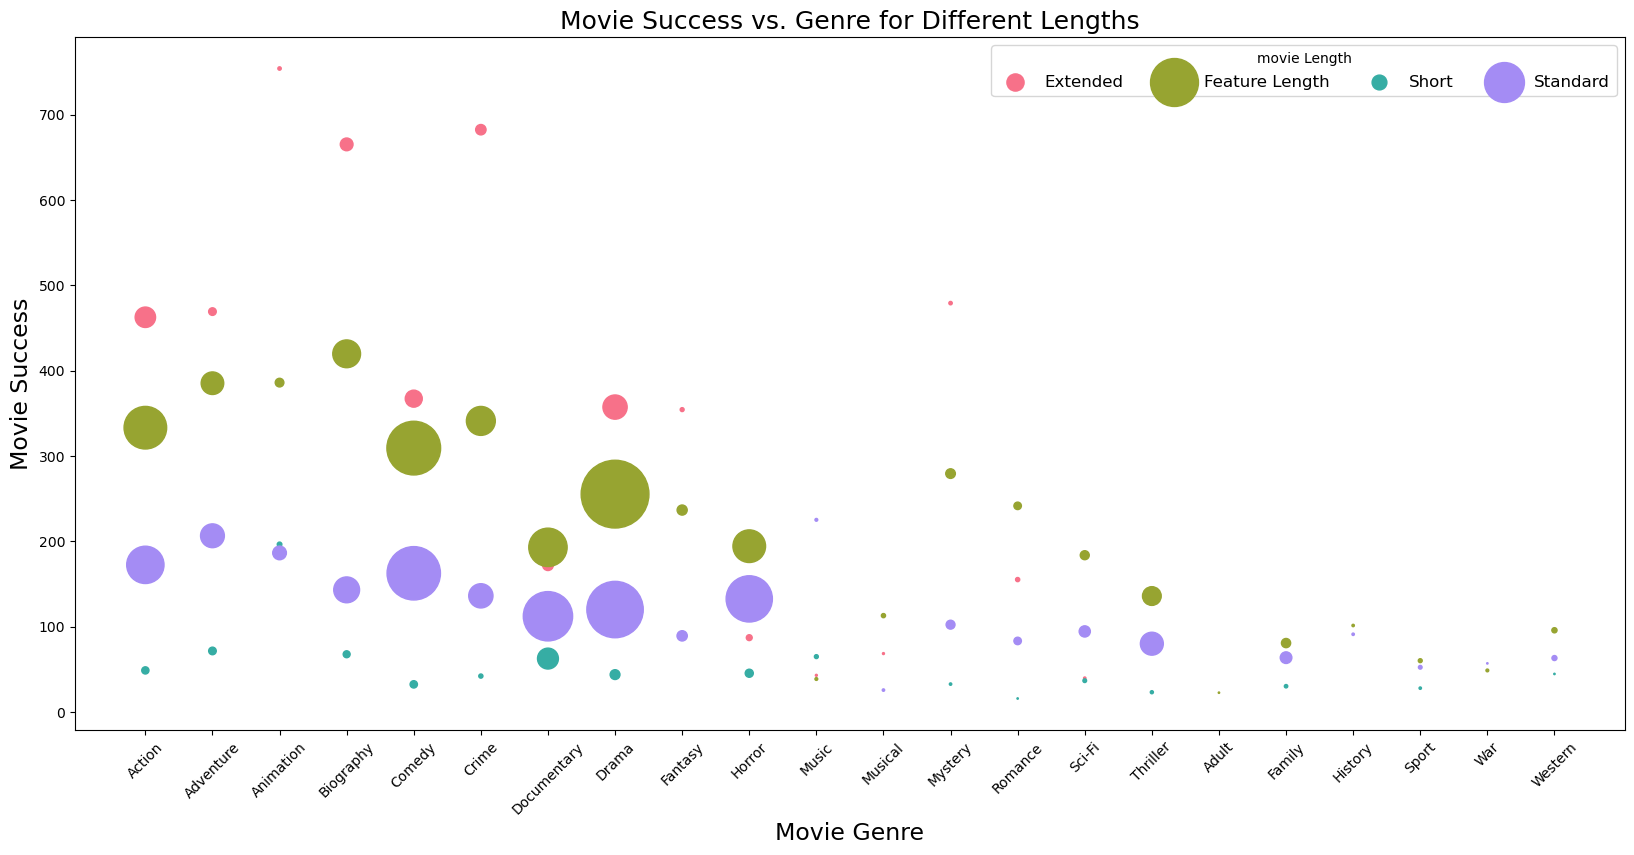

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by genres and movie age
genre_age_data = df.groupby(['genre_1', 'movie_length']).agg({
    'success_metric': 'mean',
    'id': 'count'  
}).reset_index()

# Bubble chart for numvotes vs. movie age for genres
plt.figure(figsize=(20, 9))
palette = sns.color_palette("husl", len(genre_age_data['movie_length'].unique()))

for i, genre in enumerate(genre_age_data['movie_length'].unique()):
    genre_subset = genre_age_data[genre_age_data['movie_length'] == genre]
    plt.scatter(
        genre_subset['genre_1'], 
        genre_subset['success_metric'], 
        s=genre_subset['id'] * 1.0,
        label=genre, alpha=1.0,
        color=palette[i]
    )

# Add titles, labels, and legend
plt.title('Movie Success vs. Genre for Different Lengths', fontsize=18)
plt.xlabel('Movie Genre', fontsize=17)
plt.ylabel('Movie Success', fontsize=17)
plt.xticks(rotation=45)
plt.legend(loc='upper right', fontsize=12, title='movie Length', ncol=4)
plt.show()


### Observations 
- **Extended-length** movies consistently outperform other lengths across most genres, with particularly high success in Animation, Biography, and Action - suggesting that audiences are willing to invest time in longer content when the genre interests them.
- **Documentary** emerges as a unique standout with a dominant presence in feature-length format and high success metrics, indicating this is the optimal format for documentary filmmaking.
- **There's a clear hierarchy in success based on length:** Extended > Feature > Standard > Short, with this pattern remaining fairly consistent across most genres, suggesting that longer formats generally correlate with higher success.
- **Traditional mainstream genres (Action, Adventure, Comedy, Drama)** show robust success across multiple lengths, while niche genres (Horror, Western, War) tend to have lower success metrics regardless of length.
- **Short films** consistently underperform across all genres, appearing at the bottom of the success metrics, indicating limited commercial viability for this format regardless of genre choice.

## Genre Impact on rating and votes 

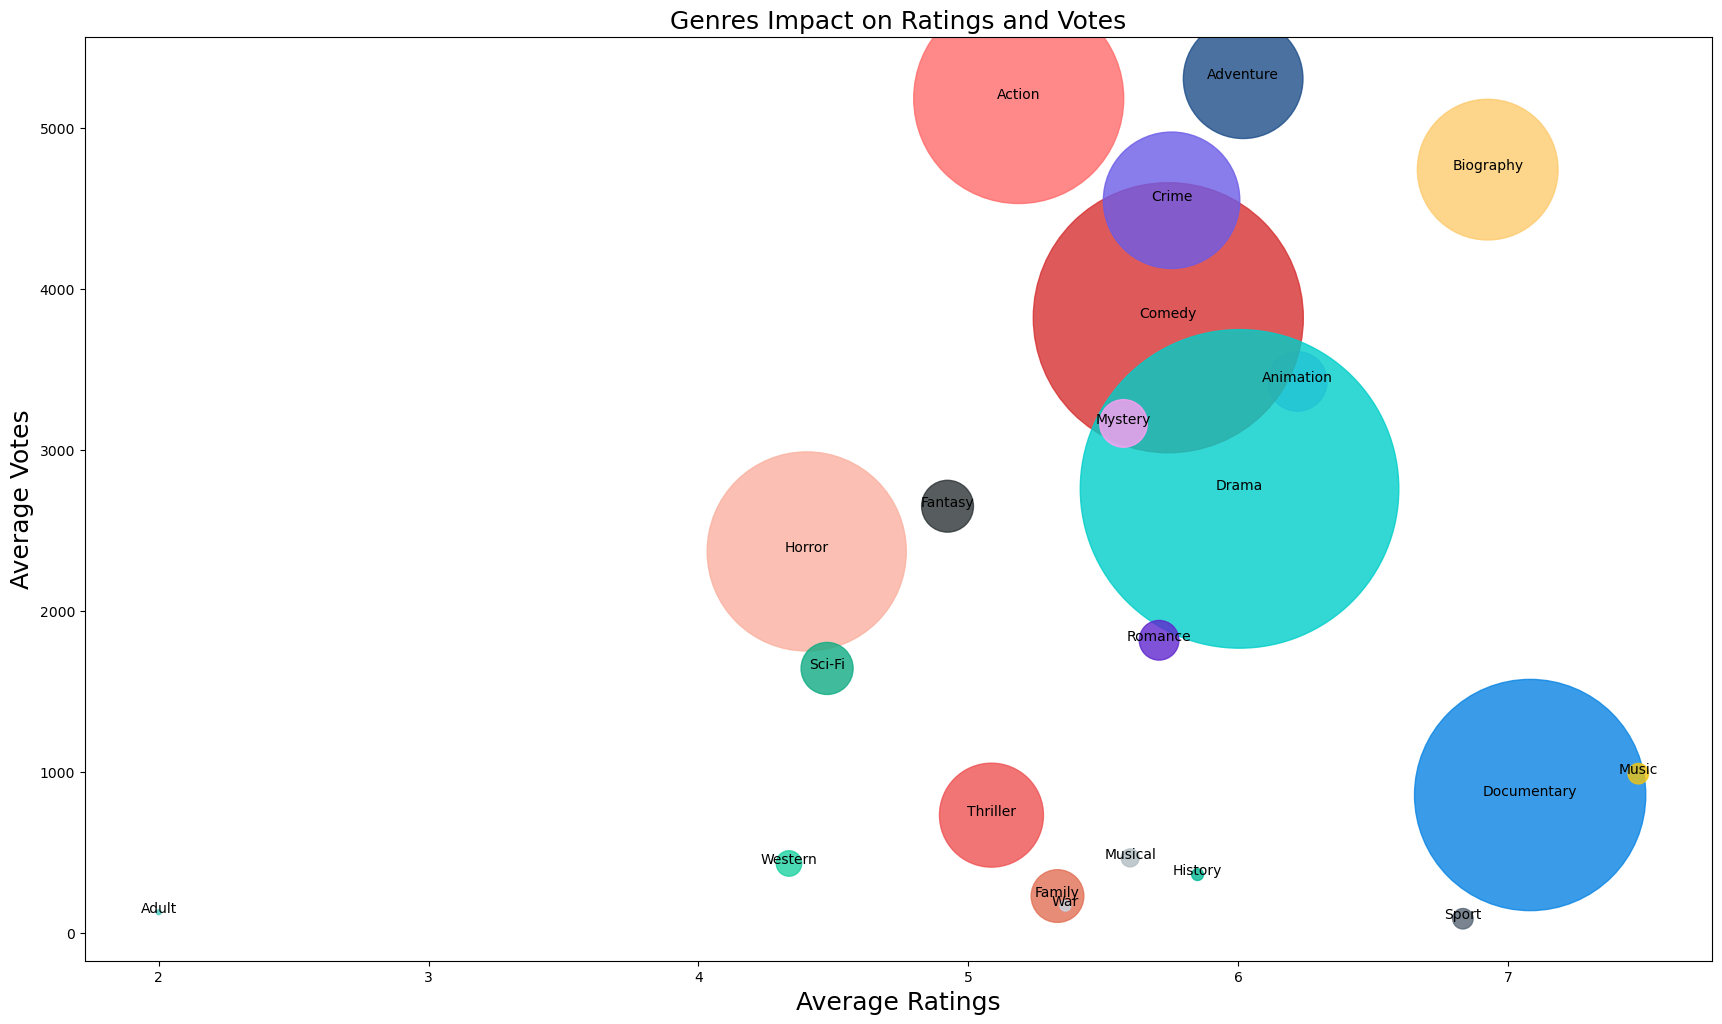

In [58]:
# Group data by genres
genre_data = df.groupby('genre_1').agg({
    'averagerating': 'mean',
    'numvotes': 'mean',
    'id': 'count'  # Total movies in each genre
}).reset_index()

# Create a color palette for genres
colors = ['#FF6B6B', '#4ECDC4', '#1D4E89', '#A29BFE', '#FDCB6E', '#D63031','#6C5CE7','#0984E3',
          '#00CEC9', '#E17055', '#2D3436', '#00B894', '#FAB1A0', '#F1C40F', '#B2BEC3','#FF9FF3',
          '#5F27CD', '#10AC84', '#576574', '#EE5253', '#C8D6E5', '#1DD1A1', '#FF6F61','#F368E0',  
         ]

# Bubble chart for genres
plt.figure(figsize=(21, 12))
plt.scatter(
    genre_data['averagerating'], 
    genre_data['numvotes'], 
    s=genre_data['id'] * 12,  # Scale bubble size
    alpha=0.8,
    c=colors[:len(genre_data)]  # Use colors up to number of genres
)

# Add titles, labels, and genre annotations
plt.title('Genres Impact on Ratings and Votes', fontsize=18)
plt.xlabel('Average Ratings', fontsize=18)
plt.ylabel('Average Votes', fontsize=18)

for i, genre in enumerate(genre_data['genre_1']):
    plt.text(
        genre_data['averagerating'][i], 
        genre_data['numvotes'][i], 
        genre, fontsize=10, ha='center',
    )

plt.show()

### Observations
**1. High Engagement, High Rating Genres**
- Action, Adventure, and Crime genres occupy the top-right quadrant of the plot, indicating they not only receive high ratings (around 5-6) but also attract a large number of votes (4000-5000), suggesting these genres have both mass appeal and quality content.

**2. Documentary Paradox:**
- Documentaries show an interesting pattern - they receive among the highest average ratings (around 7) but relatively lower vote counts (around 1000), indicating high quality but potentially more niche audience appeal.

**3. Drama's Dominant Position:**
- Drama shows one of the largest bubble sizes and maintains both strong ratings (5-6) and substantial vote counts (around 3000), suggesting it's a consistently popular and well-received genre.

**4. Adult Content Performance:**
- Adult genre appears at the bottom-left with the lowest ratings (around 2) and minimal votes, indicating both low engagement and poor reception.

**5. Quality vs. Popularity Split:**
- There's a noticeable divide where genres either excel in ratings (like Documentary, History, Music) or in vote counts (like Horror, Sci-Fi), but few manage to excel in both - with Action, Adventure, and Drama being the notable exceptions.

## Pareto Analysis 

In [59]:
from collections import Counter
import pandas as pd

# Combine genres and show the value counts
all_genres = df[['genre_1']].stack().dropna()
genre_counts = Counter(all_genres)
print(f"Genre Counts {genre_counts}") 

# Aggregate by numvotes and averagerating
genre_aggregates = (
    df[['genre_1', 'numvotes', 'averagerating']]
    .melt(id_vars = ['numvotes', 'averagerating'], value_vars=['genre_1'], value_name='genre')
    .dropna()
    .groupby('genre')
    .agg({'numvotes': 'sum', 'averagerating': 'mean'})
    .sort_values(by='numvotes', ascending=False)
)
print("Aggregated Data")
print(genre_aggregates)

Genre Counts Counter({'Drama': 4384, 'Comedy': 3150, 'Documentary': 2310, 'Action': 1905, 'Horror': 1713, 'Biography': 855, 'Crime': 804, 'Adventure': 618, 'Thriller': 467, 'Animation': 153, 'Family': 120, 'Sci-Fi': 117, 'Fantasy': 116, 'Mystery': 98, 'Romance': 68, 'Western': 28, 'Music': 18, 'Sport': 18, 'Musical': 14, 'History': 6, 'War': 5, 'Adult': 1})
Aggregated Data
             numvotes  averagerating
genre                               
Drama        12095540       6.005520
Comedy       12041676       5.741492
Action        9877592       5.187139
Horror        4060468       4.401459
Biography     4055422       6.925263
Crime         3660450       5.753607
Adventure     3280382       6.018932
Documentary   1979069       7.082468
Animation      524344       6.219608
Thriller       341668       5.086081
Mystery        310251       5.575510
Fantasy        307561       4.923276
Sci-Fi         192267       4.476923
Romance        123656       5.707353
Family          27458       5.33

In [60]:
genre_aggregates['cumulative_votes'] = genre_aggregates['numvotes'].cumsum() / genre_aggregates['numvotes'].sum() * 100
genre_aggregates['cumulative_rating'] = genre_aggregates['averagerating'].cumsum() / genre_aggregates['averagerating'].sum() * 100


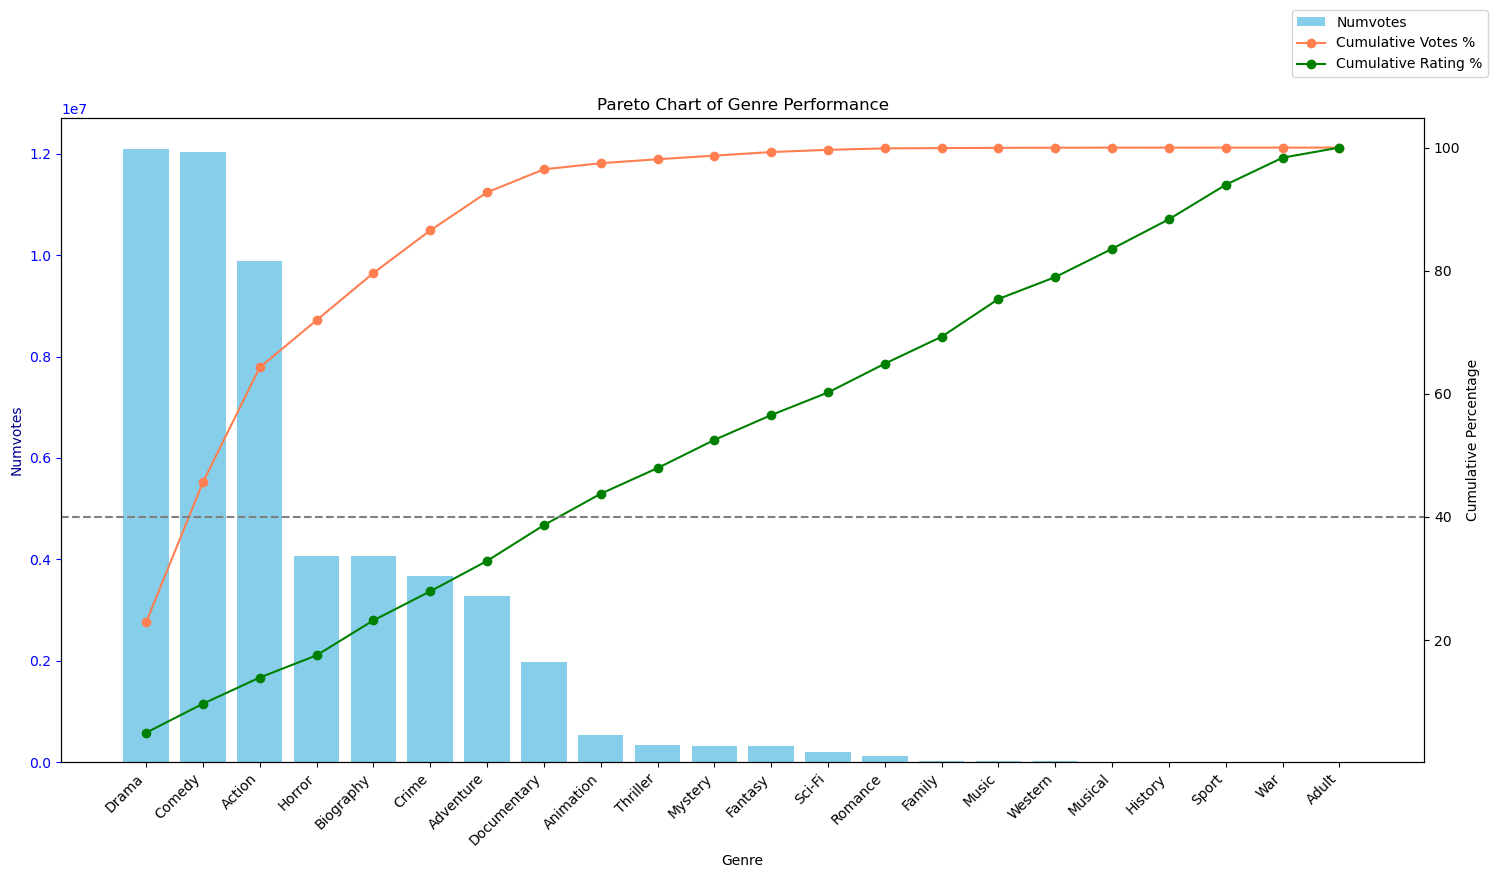

In [61]:
# Create the Pareto chart
fig, ax1 = plt.subplots(figsize=(15, 8))

# Bar chart for numvotes
ax1.bar(genre_aggregates.index, genre_aggregates['numvotes'], color='skyblue', label='Numvotes')
ax1.set_xlabel('Genre')
ax1.set_ylabel('Numvotes', color='darkblue')
ax1.tick_params('y', colors='blue')
plt.xticks(rotation=45, ha='right')
ax2 = ax1.twinx()

# Line chart for cumulative percentages
ax2.plot(genre_aggregates.index, genre_aggregates['cumulative_votes'], color='coral', marker='o', label='Cumulative Votes %')
ax2.plot(genre_aggregates.index, genre_aggregates['cumulative_rating'], color='green', marker='o', label='Cumulative Rating %')
ax2.set_ylabel('Cumulative Percentage', color='black')
ax2.tick_params('y', colors='black')

# Adding horizontal lines at the 80% level
ax2.axhline(40, color='gray', linestyle='--')
# Title and legend
plt.title('Pareto Chart of Genre Performance')
fig.legend(loc= 'upper right',bbox_to_anchor=(1,1.1))#,bbox_to_anchor=(1,1), bbox_transform=ax2.transAxes)
# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### Observations 

**1. Top 3 Dominance:** 
- Drama, Comedy, and Action are the clear leaders, accounting for a disproportionately large share of total votes (approximately 60-70% based on the cumulative votes line), suggesting these genres should be primary focus areas for studios.

**2. 80-20 Rule Application:** 
- The first 7-8 genres (Drama through Documentary) account for roughly 80% of all votes, exemplifying the Pareto principle where a small number of genres drive the majority of audience engagement.

**3. Sharp Initial Slope:**
- There's a steep rise in the cumulative percentage line for the first few genres, followed by a long tail of genres with minimal individual contribution, highlighting the significant gap between leading and niche genres.

**4. Rating vs. Votes Disparity:** 
- The cumulative rating percentage (green line) increases more gradually than the votes percentage (orange line), suggesting that higher vote counts don't necessarily correlate with proportionally higher ratings.

**5. Low-Impact Genres:** 
- Genres like Sport, War, and Adult at the far right contribute minimally to both total votes and ratings, indicating they might be less commercially viable for studios unless there's a specific strategic reason to pursue them.

## Save data

In [62]:
# Define the save path
save_path = '/home/western/Documents/Data/movies_cleaned.csv'

# Save the DataFrame to CSV
df.to_csv(save_path, index=False)

print(f"DataFrame has been saved to {save_path}")


DataFrame has been saved to /home/western/Documents/Data/movies_cleaned.csv


# Modeling 

In [63]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [64]:
df = df.drop(columns= ['id', 'title', 'original_title', 'genres', 'release_date', 'genres_list',
                      'genre_processed', 'genre_combined', 'start_year', 'year', 'season', 'movie_rating', 
                      'title_similarity', 'movie_length', 'month', 'title_length_char',
       'title_length_word', 'ratings_per_vote'
                      ], errors='ignore')


In [65]:
df.head()

,runtime_minutes,averagerating,numvotes,success_metric,genre_1,num_genres,movie_age
2,122.0,6.9,4517,463.739550,Drama,1,6
13,104.0,4.0,72,33.941125,Drama,1,6
16,91.0,1.9,8248,172.555151,Action,3,11
19,75.0,5.9,123,65.434165,Biography,3,11
25,100.0,3.9,219,57.714729,Comedy,1,15


### Label Encoder
- Convert categorical data to numerical data 

In [66]:
# Encode categorical features
categorical_features = ['genre_1']

#Initialize and apply Label Encoding directly to 'df'
label_encoders = {}
for col in categorical_features:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

#Display a portion of the modified DataFrame
df.head()

,runtime_minutes,averagerating,numvotes,success_metric,genre_1,num_genres,movie_age
2,122.0,6.9,4517,463.739550,8,1,6
13,104.0,4.0,72,33.941125,8,1,6
16,91.0,1.9,8248,172.555151,0,3,11
19,75.0,5.9,123,65.434165,4,3,11
25,100.0,3.9,219,57.714729,5,1,15


### Selecting the dependent and independent variables 

In [67]:
df_new = df.copy()

# Drop null values
df_new = df_new.dropna()

# Defining the independent variables/features
X = df_new.drop(columns=['success_metric'])

# Target variable
y = df_new['success_metric']

# Split into training and temporary sets (70% train, 30% temp)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [68]:
df.head()

,runtime_minutes,averagerating,numvotes,success_metric,genre_1,num_genres,movie_age
2,122.0,6.9,4517,463.739550,8,1,6
13,104.0,4.0,72,33.941125,8,1,6
16,91.0,1.9,8248,172.555151,0,3,11
19,75.0,5.9,123,65.434165,4,3,11
25,100.0,3.9,219,57.714729,5,1,15


### Scaling 

In [69]:
# Columns to scale
columns_to_scale = ['runtime_minutes', 'averagerating', 'numvotes', 'movie_age',
                    'genre_1']

# Initialize the standard scaler
scaler = StandardScaler()

# Fit and transform the specified columns in the training data
X_train_scaled = X_train.copy()
X_train_scaled[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])


X_test_scaled = X_test.copy()
X_test_scaled[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

## OLS

## Hypothesis 

**1. Null Hypothesis ($𝐻_0$):**
- Each predictor has no statistically significant relationship with the dependent variable (success_metric), i.e., the coefficients of the predictors are equal to zero.

**2. Alternative Hypothesis ($𝐻_𝐴$)**
- At least one predictor has a statistically significant relationship with the dependent variable (success_metric), i.e., at least one of the coefficients is not equal to zero.

In [70]:
# Add a constant to the predictors (for statsmodels)
X_train_const = sm.add_constant(X_train_scaled)

# Fit the model
linreg = sm.OLS(y_train, X_train_const).fit()

# Print the model summary with column names
linreg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         success_metric   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                 1.564e+04
Date:                Sat, 18 Jan 2025   Prob (F-statistic):               0.00
Time:                        19:21:06   Log-Likelihood:                -70687.
No. Observations:               11877   AIC:                         1.414e+05
Df Residuals:                   11870   BIC:                         1.414e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             186.2417      2.442     76.273      0.000     181.455     191.028
runtime_minutes    24.9923      0.884     28.279      0.000      23.260      26.725
averagerating      30.8468      0.874     35.309      0.000      29.134      32.559
numvotes          246.1146      0.902    272.982      0.000     244.347     247.882
genre_1            -0.8892      0.966     -0.921      0.357      -2.782       1.004
num_genres         14.3522      1.155     12.429      0.000      12.089      16.616
movie_age          -1.9834      0.854     -2.323      0.020      -3.657      -0.309
==============================================================================
Omnibus:                     1076.657   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7181.282
Skew:                          -0.129   Prob(JB):                         0.00
Kurtosis:                       6.801   Cond. No.                         7.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model Analysis 

**1. R-squared:**
- R-squared of 0.888, meaning 88.8% of the variation in the success_metric is explained by the predictors in the model. The high Adjusted R-squared confirms this even after accounting for the number of predictors.

**2. F-statistic:**
- **$1.564e+04$** with **$𝑝= 0.00$** indicating the overall model is statistically significant.
Coefficients and Interpretation:
- Intercept (const): 186.24 — the baseline value of the success_metric when all predictors are zero.

- **Runtime_minutes:** Positive and significant **(β=24.99,p<0.05)**, indicating longer movies tend to have higher success metrics.
- **Averagerating:** Positive and significant **(β=30.85,p<0.05)**, meaning higher ratings strongly correlate with success.
- **Numvotes:** Strongly positive and significant **(β=246.11,p<0.05)**, showing audience engagement significantly impacts success.
- **Genre_1:** Not statistically significant **(p=0.357)**, suggesting that specific primary genres don't independently drive success.
- **Num_genres:** Positive and significant **(β=14.35,p<0.05)**, implying that movies with more genres tend to perform better.
- **Movie_age:** Negative and significant **(β=−1.98,p<0.05)**, indicating older movies tend to have slightly lower success metrics.

**3. Model Diagnostics:**
- **Omnibus and Jarque-Bera Tests:** Significant **(p=0.00)**, suggesting potential deviations from normality in residuals.
- **Durbin-Watson: 1.982,** close to 2, indicating no strong autocorrelation in residuals.
- **Condition Number: 7.49,** implying no severe multicollinearity among predictors.


## Variance Infelction Factor

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_scaled.values, i) for i in range(X_train_scaled.shape[1])]

print(vif_data)


           Feature       VIF
0  runtime_minutes  1.068893
1    averagerating  1.032063
2         numvotes  1.083923
3          genre_1  1.071106
4       num_genres  1.037602
5        movie_age  1.000612


### Observations 
- No Multicorlinearlity withoin column  

## Model Elauation 

In [72]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Add a constant to the test data
X_test_const = sm.add_constant(X_test_scaled)

# Perform predictions on the test data
y_pred = linreg.predict(X_test_const)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1 - r2) * ((len(y_test) - 1) / (len(y_test) - X_test_const.shape[1] - 1))

# Display the metrics
print("Model Evaluation Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")
print(f"Adjusted R²: {adjusted_r2:.2f}")

Model Evaluation Metrics:
MAE: 67.20
MSE: 8431.50
RMSE: 91.82
R²: 0.89
Adjusted R²: 0.89


### Interpretation of the Model Evaluation Metrics:

**1. Mean Absolute Error (MAE): 67.20**
- MAE of 67.20 means that, on average, the model’s predictions are off by 67.20 units of the success_metric.

**2. Mean Squared Error (MSE): 8431.50**
- A higher value like 8431.50 indicates that while most predictions are close, some outliers or large errors could exist.

**3. Root Mean Squared Error (RMSE): 91.82**
- RMSE of 91.82 indicates the model’s typical prediction error is about 91.82 units. Lower RMSE indicates a better fit.

**4. ² (R-Squared): 0.89**
- R² of 0.89 means the model explains 89% of the variation in success_metric, indicating a strong fit.

**5. Adjusted R²: 0.89**
- The similarity between R² and Adjusted R² (both 0.89) suggests that most predictors are meaningful and contribute to the model’s performance.

**6. Overall Evaluation:**
- The model performs well, as evidenced by the high R² and Adjusted R² values (0.89).
- However, the error metrics (MAE, MSE, RMSE) highlight that while the model is accurate for the most part, there is room for improvement in reducing prediction errors, especially for extreme cases.

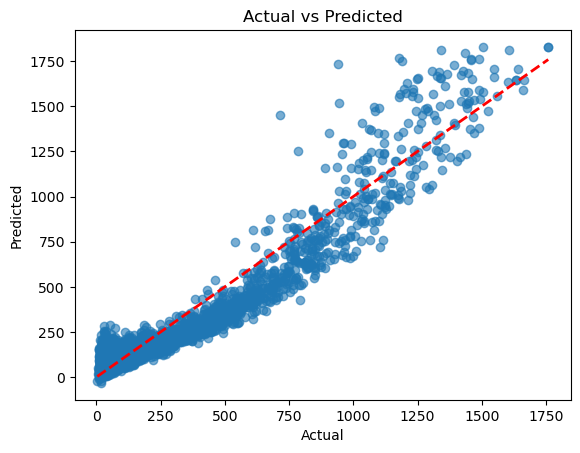

In [73]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

### Observation 
- Strong positive correlation shown by points following the red diagonal line, indicating good model performance
- Increasing scatter/spread as values get larger, suggesting heteroscedasticity
- Model performs better for lower values, shown by tighter clustering around the line

## Residual vs Predictions plot

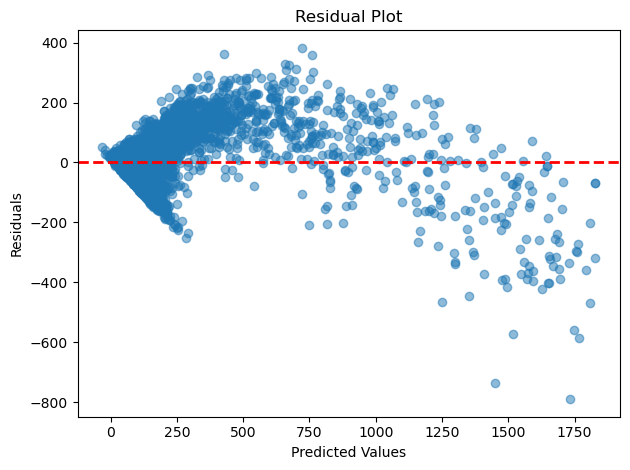

In [74]:
# Make predictions on the testing data
#y_pred = model.predict(X_test_scaled)

# Calculate residuals
residuals = y_test - y_pred

# Residual plot for each model
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Adjust layout
plt.tight_layout()
plt.show()

### Observations 
- Fan-shaped pattern, with residuals spreading out as predicted values increase
- Mostly symmetric around zero line for lower predictions, but shows negative bias for higher values
- Clear heteroscedasticity pattern, indicating variance isn't constant across predictions

## KDE plot 

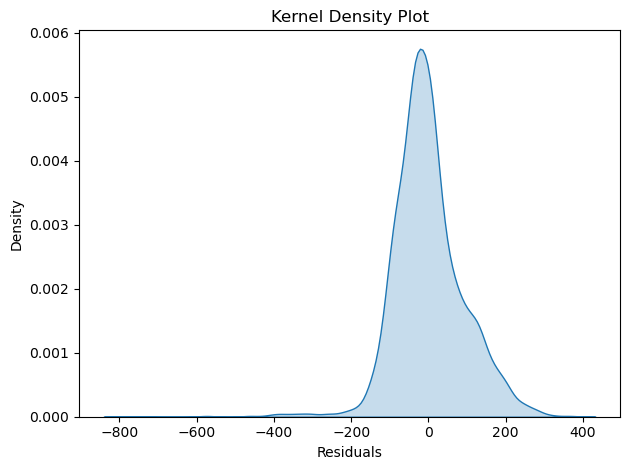

In [75]:

# Kernel density plot for residuals of each model
sns.kdeplot(residuals, fill=True)
plt.title('Kernel Density Plot')
plt.xlabel('Residuals')
plt.ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

### Observations
- Distribution is roughly bell-shaped but slightly left-skewed (negative tail)
- Peak is centered near zero, suggesting unbiased predictions for most cases
- Long tail on the left indicates some significant underpredictions

## Q-Q Plot

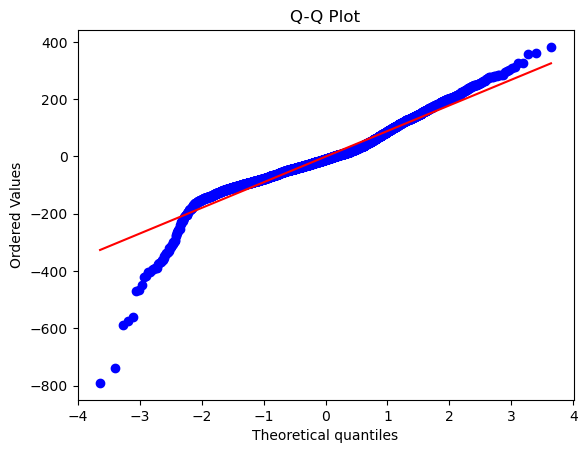

In [76]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

### Observations
- Good alignment with the diagonal line in the middle range, indicating normality for most residuals
- Deviation at both tails, particularly strong at the lower tail (below -2)
- Suggests residuals follow a mostly normal distribution but with heavier tails than expected, especially for negative values

## Model Recommendations 
**1. Key Issues Identified:**

- Heteroscedasticity (shown in residual plot)
- Non-normal residuals at the tails (from Q-Q plot)
- Decreased accuracy for higher values (visible in actual vs predicted)

**2. Suggested Improvements:**

- **Model Enhancements:**

> Try non-linear models (Random Forest, XGBoost) to capture complex patterns

> Implement polynomial features for potential non-linear relationships

> Consider ensemble methods to improve predictions at higher values

- **Feature Engineering:**

> Create interaction terms between important features

> Bin or segment data where prediction patterns differ significantly

> Review and potentially remove outliers if they're not representative

- **Error Handling:**

> Implement weighted loss functions to balance errors across the range. Consider separate models for different ranges if patterns vary significantly